# Imports

In [1]:

import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from tabulate import tabulate

# Configs

In [2]:
LABELED_PATH = "/Users/maedeh/Desktop/demand_project/demand_project/shoofer-demand-prediction/data/labels_phase2.parquet"
PREDICTED_XGB_PATH = "/Users/maedeh/Desktop/demand_project/demand_project/shoofer-demand-prediction/data/XGB_predictions_phase2.parquet"
PREDICTED_XGB_Ridge_PATH = "/Users/maedeh/Desktop/demand_project/demand_project/shoofer-demand-prediction/data/XGB_ridge_predictions_phase2.parquet"
# PREDICTED_XGB_ARIMA_PATH = "../data/results/xgb_predictions_tuned.parquet"
# PREDICTED_REGRESSION_PATH = "../data/results/ridge_predictions.parquet"
# PREDICTED_ARIMA_PATH = "../data/results/arima_predict.parquet"
TEST_START_DATE = '2023-04-01'
LAST_WEEK_TEST_START_DATE = '2023-03-25'

HIGH_DEMAND_NUMS = 14
MID_DEMAND_NUMS = 26
SAVE_PLOT_PATH = '/Users/maedeh/Desktop/data/pngs/'
warnings.filterwarnings('ignore')

In [3]:
report_dict = {
    'high_demand_locations':{
        'MAPE':{
            'baseline_last_week':None,
            'model_regression':None,
            'model_xgboost':None,
            'model_xgboost_ridge':None
        },
        'MAE':{
            'baseline_last_week':None,
            'model_regression':None,
            'model_xgboost':None,
            'model_xgboost_ridge':None
        },
        'RMSE':{
            'baseline_last_week':None,
            'model_regression':None,
            'model_xgboost':None,
            'model_xgboost_ridge':None
        }
        
    },
    'mid_demand_locations':{
        'MAPE':{
            'baseline_last_week':None,
            'model_regression':None,
            'model_xgboost':None,
            'model_xgboost_ridge':None
        },
        'MAE':{
            'baseline_last_week':None,
            'model_regression':None,
            'model_xgboost':None,
            'model_xgboost_ridge':None
        },
        'RMSE':{
            'baseline_last_week':None,
            'model_regression':None,
            'model_xgboost':None,
            'model_xgboost_ridge':None
        }
        
    },    
    'low_demand_locations':{
        'MAPE':{
            'baseline_last_week':None,
            'model_regression':None,
            'model_xgboost':None,
            'model_xgboost_ridge':None
        },
        'MAE':{
            'baseline_last_week':None,
            'model_regression':None,
            'model_xgboost':None,
            'model_xgboost_ridge':None
        },
        'RMSE':{
            'baseline_last_week':None,
            'model_regression':None,
            'model_xgboost':None,
            'model_xgboost_ridge':None
        }
        
    },
    'all_locations':{
        'MAPE':{
            'baseline_last_week':None,
            'model_regression':None,
            'model_xgboost':None,
            'model_xgboost_ridge':None
        },
        'MAE':{
            'baseline_last_week':None,
            'model_regression':None,
            'model_xgboost':None,
            'model_xgboost_ridge':None
        },
        'RMSE':{
            'baseline_last_week':None,
            'model_regression':None,
            'model_xgboost':None,
            'model_xgboost_ridge':None
        }
    },
    
    
}

In [4]:
predictions_dict = {
    'baseline_last_week':None,
    'model_regression':None,
    'model_xgboost':None,
    'model_xgboost_ridge':None
}

In [5]:
sorted_locations_dict={
    'baseline_last_week':None,
    'model_regression':None,
    'model_xgboost':None,
    'model_xgboost_ridge':None
}

In [6]:
predictions_mean_error_dict={
    
    'baseline_last_week':
    {
        'Location':
                {
                'high_demand_loc':None,
                'mid_demand_loc':None,
                'low_demand_loc':None,
                'all_loc':None
                },
        'Date':
                {
                'high_demand_loc':None,
                'mid_demand_loc':None,
                'low_demand_loc':None,
                'all_loc':None
                },
        'Hour_interval':
                {
                'high_demand_loc':None,
                'mid_demand_loc':None,
                'low_demand_loc':None,
                'all_loc':None
                },
        'day_of_week':
                {
                'high_demand_loc':None,
                'mid_demand_loc':None,
                'low_demand_loc':None,
                'all_loc':None
                }
    },
    'model_regression':
    {
        'Location':
                {
                'high_demand_loc':None,
                'mid_demand_loc':None,
                'low_demand_loc':None,
                'all_loc':None
                },
        'Date':
                {
                'high_demand_loc':None,
                'mid_demand_loc':None,
                'low_demand_loc':None,
                'all_loc':None
                },
        'Hour_interval':
                {
                'high_demand_loc':None,
                'mid_demand_loc':None,
                'low_demand_loc':None,
                'all_loc':None
                },
        'day_of_week':
                {
                'high_demand_loc':None,
                'mid_demand_loc':None,
                'low_demand_loc':None,
                'all_loc':None
                }
    },
    'model_xgboost':
    {
        'Location':
                {
                'high_demand_loc':None,
                'mid_demand_loc':None,
                'low_demand_loc':None,
                'all_loc':None
                },
        'Date':
                {
                'high_demand_loc':None,
                'mid_demand_loc':None,
                'low_demand_loc':None,
                'all_loc':None
                },
        'Hour_interval':
                {
                'high_demand_loc':None,
                'mid_demand_loc':None,
                'low_demand_loc':None,
                'all_loc':None
                },
        'day_of_week':
                {
                'high_demand_loc':None,
                'mid_demand_loc':None,
                'low_demand_loc':None,
                'all_loc':None
                }
    },
    'model_xgboost_ridge':
    {
        'Location':
                {
                'high_demand_loc':None,
                'mid_demand_loc':None,
                'low_demand_loc':None,
                'all_loc':None
                },
        'Date':
                {
                'high_demand_loc':None,
                'mid_demand_loc':None,
                'low_demand_loc':None,
                'all_loc':None
                },
        'Hour_interval':
                {
                'high_demand_loc':None,
                'mid_demand_loc':None,
                'low_demand_loc':None,
                'all_loc':None
                },
        'day_of_week':
                {
                'high_demand_loc':None,
                'mid_demand_loc':None,
                'low_demand_loc':None,
                'all_loc':None
                }
    },
}

# Load Data

## Load labeled data

In [7]:
labeled_df = pd.read_parquet(LABELED_PATH)
print(labeled_df.shape)
labeled_df.head()

(251520, 4)


Location       Date  Hour_interval  Demand
0         1 2023-01-01              0     0.0
1         1 2023-01-01              3     1.0
2         1 2023-01-01              6     1.0
3         1 2023-01-01              9     1.0
4         1 2023-01-01             12    13.0

In [8]:
test_df = labeled_df.loc[labeled_df['Date']>=TEST_START_DATE]
test_df = test_df.reset_index(drop = True)
print(test_df.shape)
test_df.head()

(62880, 4)


Location       Date  Hour_interval  Demand
0         1 2023-04-01              0     0.0
1         1 2023-04-01              3     1.0
2         1 2023-04-01              6     1.0
3         1 2023-04-01              9     0.0
4         1 2023-04-01             12     1.0

## Load Predicted Data

In [9]:
predictions_dict['model_xgboost'] = pd.read_parquet(PREDICTED_XGB_PATH)
print(predictions_dict['model_xgboost'].shape)
predictions_dict['model_xgboost'].head()

(62880, 4)


Location       Date  Hour_interval  Predicted_demand
0         1 2023-04-01              0          0.480933
1         1 2023-04-01              3          0.750945
2         1 2023-04-01              6          3.357425
3         1 2023-04-01              9          1.939667
4         1 2023-04-01             12          3.045500

In [10]:
predictions_dict['model_xgboost_ridge'] = pd.read_parquet(PREDICTED_XGB_Ridge_PATH)
print(predictions_dict['model_xgboost_ridge'].shape)
predictions_dict['model_xgboost_ridge'].head()

(62880, 4)


Location       Date  Hour_interval  Predicted_demand
0         1 2023-04-01              0          0.401551
1         1 2023-04-01              3          0.763712
2         1 2023-04-01              6          2.413859
3         1 2023-04-01              9          1.662572
4         1 2023-04-01             12          3.004503

### BaseLine Models

In [11]:
def baseline_predict(dataset, shift_val):
    predicted_demand = dataset.groupby(['Location'])['Demand'].shift(shift_val)
    predicted_data = pd.DataFrame(dataset[['Location', 'Date', 'Hour_interval']])
    predicted_data['Predicted_demand'] = predicted_demand
    return predicted_data

In [12]:
baseline_test_df = labeled_df.loc[labeled_df['Date']>=LAST_WEEK_TEST_START_DATE]
baseline_test_df = baseline_test_df.reset_index(drop = True)
print(baseline_test_df.shape)
baseline_test_df.head()


(77552, 4)


Location       Date  Hour_interval  Demand
0         1 2023-03-25              0     0.0
1         1 2023-03-25              3     0.0
2         1 2023-03-25              6     3.0
3         1 2023-03-25              9     2.0
4         1 2023-03-25             12     3.0

In [13]:
predictions_dict['baseline_last_week'] = baseline_predict(baseline_test_df, 7*8)
predictions_dict['baseline_last_week'] = predictions_dict['baseline_last_week'].dropna()
print(predictions_dict['baseline_last_week'].shape)
predictions_dict['baseline_last_week'].head()

(62880, 4)


Location       Date  Hour_interval  Predicted_demand
56         1 2023-04-01              0               0.0
57         1 2023-04-01              3               0.0
58         1 2023-04-01              6               3.0
59         1 2023-04-01              9               2.0
60         1 2023-04-01             12               3.0

### Join Predictions and Actual

In [14]:
def join_actual_predict(actual_df, predicted_df):
    actual_predicted_df = actual_df.merge(predicted_df, how='left', on=['Location', 'Date', 'Hour_interval'])
    actual_predicted_df['Date'] = pd.to_datetime(actual_predicted_df['Date'])
    actual_predicted_df['day_of_week'] = actual_predicted_df['Date'].dt.dayofweek
    return actual_predicted_df

In [15]:
predictions_dict['baseline_last_week'] = join_actual_predict(test_df,predictions_dict['baseline_last_week'])
print(predictions_dict['baseline_last_week'].shape)
predictions_dict['baseline_last_week'].head()

(62880, 6)


Location       Date  Hour_interval  Demand  Predicted_demand  day_of_week
0         1 2023-04-01              0     0.0               0.0            5
1         1 2023-04-01              3     1.0               0.0            5
2         1 2023-04-01              6     1.0               3.0            5
3         1 2023-04-01              9     0.0               2.0            5
4         1 2023-04-01             12     1.0               3.0            5

In [16]:
predictions_dict['model_xgboost'] = join_actual_predict(test_df,predictions_dict['model_xgboost'])
print(predictions_dict['model_xgboost'].shape)
predictions_dict['model_xgboost'].head()

(62880, 6)


Location       Date  Hour_interval  Demand  Predicted_demand  day_of_week
0         1 2023-04-01              0     0.0          0.480933            5
1         1 2023-04-01              3     1.0          0.750945            5
2         1 2023-04-01              6     1.0          3.357425            5
3         1 2023-04-01              9     0.0          1.939667            5
4         1 2023-04-01             12     1.0          3.045500            5

In [17]:
predictions_dict['model_xgboost_ridge'] = join_actual_predict(test_df,predictions_dict['model_xgboost_ridge'])
print(predictions_dict['model_xgboost_ridge'].shape)
predictions_dict['model_xgboost_ridge'].head()

(62880, 6)


Location       Date  Hour_interval  Demand  Predicted_demand  day_of_week
0         1 2023-04-01              0     0.0          0.401551            5
1         1 2023-04-01              3     1.0          0.763712            5
2         1 2023-04-01              6     1.0          2.413859            5
3         1 2023-04-01              9     0.0          1.662572            5
4         1 2023-04-01             12     1.0          3.004503            5

### Sort Locations by Demand

In [18]:
def sort_locations_on_demand(predictions_dict,sorted_locations_dict):
    for label,predictions_df in predictions_dict.items():
        if (predictions_df is not None):
            sorted_index = predictions_df.groupby('Location')['Demand'].aggregate(['sum']).sort_values('sum', ascending=False)
            sorted_index = sorted_index.reset_index()
            sorted_locations_dict[label] = sorted_index
            

In [19]:
sort_locations_on_demand(predictions_dict, sorted_locations_dict)
print(sorted_locations_dict['baseline_last_week'].shape)
sorted_locations_dict['baseline_last_week'].head()

(262, 2)


Location       sum
0       132  173355.0
1       237  153779.0
2       161  149098.0
3       236  138316.0
4       142  113448.0

In [20]:
sort_locations_on_demand(predictions_dict, sorted_locations_dict)
print(sorted_locations_dict['model_xgboost'].shape)
sorted_locations_dict['model_xgboost'].head()

(262, 2)


Location       sum
0       132  173355.0
1       237  153779.0
2       161  149098.0
3       236  138316.0
4       142  113448.0

In [21]:
sort_locations_on_demand(predictions_dict, sorted_locations_dict)
print(sorted_locations_dict['model_xgboost_ridge'].shape)
sorted_locations_dict['model_xgboost_ridge'].head()

(262, 2)


Location       sum
0       132  173355.0
1       237  153779.0
2       161  149098.0
3       236  138316.0
4       142  113448.0

# Mean error Calculation

### Error Columns

In [22]:
def calculate_error(actual_predicted_dict: dict):
    for label,actual_predicted_df in actual_predicted_dict.items():
        if (actual_predicted_df is not None):
            actual_predicted_df['error'] = np.abs(
                actual_predicted_df['Demand']-actual_predicted_df['Predicted_demand']
                )
            actual_predicted_df['squared_error'] = np.square(
                actual_predicted_df['Demand']-actual_predicted_df['Predicted_demand']
                )
            actual_Demand_df = np.where(actual_predicted_df['Demand']==0, 1, actual_predicted_df['Demand'])
            actual_predicted_df['percentage_error'] = (
                actual_predicted_df['error']/actual_Demand_df
                )*100
            

In [23]:
calculate_error(predictions_dict)


In [24]:
print(predictions_dict['baseline_last_week'].shape)
predictions_dict['baseline_last_week'].head()

(62880, 9)


Location       Date  Hour_interval  Demand  Predicted_demand  day_of_week  \
0         1 2023-04-01              0     0.0               0.0            5   
1         1 2023-04-01              3     1.0               0.0            5   
2         1 2023-04-01              6     1.0               3.0            5   
3         1 2023-04-01              9     0.0               2.0            5   
4         1 2023-04-01             12     1.0               3.0            5   

   error  squared_error  percentage_error  
0    0.0            0.0               0.0  
1    1.0            1.0             100.0  
2    2.0            4.0             200.0  
3    2.0            4.0             200.0  
4    2.0            4.0             200.0

In [25]:
print(predictions_dict['model_xgboost'].shape)
predictions_dict['model_xgboost'].head()

(62880, 9)


Location       Date  Hour_interval  Demand  Predicted_demand  day_of_week  \
0         1 2023-04-01              0     0.0          0.480933            5   
1         1 2023-04-01              3     1.0          0.750945            5   
2         1 2023-04-01              6     1.0          3.357425            5   
3         1 2023-04-01              9     0.0          1.939667            5   
4         1 2023-04-01             12     1.0          3.045500            5   

      error  squared_error  percentage_error  
0  0.480933       0.231296         48.093277  
1  0.249055       0.062028         24.905479  
2  2.357425       5.557455        235.742545  
3  1.939667       3.762308        193.966711  
4  2.045500       4.184069        204.549980

In [26]:
print(predictions_dict['model_xgboost_ridge'].shape)
predictions_dict['model_xgboost_ridge'].head()

(62880, 9)


Location       Date  Hour_interval  Demand  Predicted_demand  day_of_week  \
0         1 2023-04-01              0     0.0          0.401551            5   
1         1 2023-04-01              3     1.0          0.763712            5   
2         1 2023-04-01              6     1.0          2.413859            5   
3         1 2023-04-01              9     0.0          1.662572            5   
4         1 2023-04-01             12     1.0          3.004503            5   

      error  squared_error  percentage_error  
0  0.401551       0.161243         40.155077  
1  0.236288       0.055832         23.628789  
2  1.413859       1.998998        141.385913  
3  1.662572       2.764147        166.257238  
4  2.004503       4.018034        200.450349

### Aggregate Error Columns

In [27]:
def calculate_mean_error(actual_predicted_dict: dict, predictions_mean_dict: dict):
    per_columns=['Location', 'Date', 'Hour_interval', 'day_of_week']
    for model,actual_predicted_df in actual_predicted_dict.items():
        if (actual_predicted_df is not None):
            sorted_index = sorted_locations_dict[model]['Location']
            high_demand_actual_predicted_df = actual_predicted_df.loc[actual_predicted_df['Location'].isin(sorted_index[:HIGH_DEMAND_NUMS])]
            mid_demand_actual_predicted_df = actual_predicted_df.loc[actual_predicted_df['Location'].isin(sorted_index[HIGH_DEMAND_NUMS:HIGH_DEMAND_NUMS+MID_DEMAND_NUMS])]
            low_demand_actual_predicted_df = actual_predicted_df.loc[actual_predicted_df['Location'].isin(sorted_index[HIGH_DEMAND_NUMS+MID_DEMAND_NUMS:])]
            for per in per_columns:
                high_demand_error_df = high_demand_actual_predicted_df[[per,'Demand','error','squared_error', 'percentage_error']] 
                mid_demand_error_df = mid_demand_actual_predicted_df[[per,'Demand','error','squared_error','percentage_error']] 
                low_demand_error_df = low_demand_actual_predicted_df[[per,'Demand','error','squared_error','percentage_error']] 
                all_error_df = actual_predicted_df[[per,'Demand','error','squared_error','percentage_error']]
                
                high_demand_mean_df = (
                    high_demand_error_df.groupby(per).agg(mape=('percentage_error','mean'),
                                                            mae=('error','mean'),
                                                            mse=('squared_error','mean'),
                                                            demand_mean=('Demand','mean'))) 
                mid_demand_mean_df = (
                    mid_demand_error_df.groupby(per).agg(mape=('percentage_error','mean'),
                                                            mae=('error','mean'),
                                                            mse=('squared_error','mean'),
                                                            demand_mean=('Demand','mean')))
                low_demand_mean_df = (
                    low_demand_error_df.groupby(per).agg(mape=('percentage_error','mean'),
                                                            mae=('error','mean'),
                                                            mse=('squared_error','mean'),
                                                            demand_mean=('Demand','mean')))
                all_mean_df = (
                    all_error_df.groupby(per).agg(mape=('percentage_error','mean'),
                                                    mae=('error','mean'),
                                                    mse=('squared_error','mean'),
                                                    demand_mean=('Demand','mean'))) 
                
                high_demand_mean_df['mape'] = np.where(high_demand_mean_df['mape']>100, 100, high_demand_mean_df['mape'])
                mid_demand_mean_df['mape'] = np.where(mid_demand_mean_df['mape']>100, 100, mid_demand_mean_df['mape'])
                low_demand_mean_df['mape'] = np.where(low_demand_mean_df['mape']>100, 100, low_demand_mean_df['mape'])
                all_mean_df['mape'] = np.where(all_mean_df['mape']>100, 100, all_mean_df['mape'])
                if per == 'Location':
                    high_demand_mean_df = high_demand_mean_df.reindex(sorted_index[:HIGH_DEMAND_NUMS])
                    mid_demand_mean_df = mid_demand_mean_df.reindex(sorted_index[HIGH_DEMAND_NUMS:HIGH_DEMAND_NUMS+MID_DEMAND_NUMS])
                    low_demand_mean_df = low_demand_mean_df.reindex(sorted_index[HIGH_DEMAND_NUMS+MID_DEMAND_NUMS:])
                    all_mean_df = all_mean_df.reindex(sorted_index)
                
                predictions_mean_dict[model][per]['high_demand_loc'] = high_demand_mean_df.reset_index()
                predictions_mean_dict[model][per]['mid_demand_loc'] = mid_demand_mean_df.reset_index()
                predictions_mean_dict[model][per]['low_demand_loc'] = low_demand_mean_df.reset_index()
                predictions_mean_dict[model][per]['all_loc'] = all_mean_df.reset_index()
                
    

In [28]:
calculate_mean_error(predictions_dict, predictions_mean_error_dict)

In [29]:
print(predictions_mean_error_dict['baseline_last_week']['Date']['mid_demand_loc'].shape)
predictions_mean_error_dict['baseline_last_week']['Date']['mid_demand_loc'].head()

(30, 5)


Date       mape        mae          mse  demand_mean
0 2023-04-01  15.342613  33.985577  2660.264423   269.711538
1 2023-04-02  15.895466  24.110577  1103.072115   211.610577
2 2023-04-03  17.472835  24.524038  1332.812500   178.062500
3 2023-04-04  20.851770  24.269231  1284.000000   205.687500
4 2023-04-05  19.873753  35.153846  2692.759615   222.754808

In [30]:
print(predictions_mean_error_dict['model_xgboost']['Location']['high_demand_loc'].shape)
predictions_mean_error_dict['model_xgboost']['Location']['high_demand_loc'].tail()

(14, 5)


Location       mape        mae          mse  demand_mean
9        170  15.007428  42.293257  3489.218884   399.108333
10       163  13.750848  42.286594  3581.560950   398.879167
11       239  15.033357  42.104812  3356.319890   388.370833
12        48  10.573241  35.059727  2405.850690   372.975000
13       234  16.429688  35.578520  2561.662095   368.862500

In [31]:
print(predictions_mean_error_dict['model_xgboost_ridge']['Hour_interval']['low_demand_loc'].shape)
predictions_mean_error_dict['model_xgboost_ridge']['Hour_interval']['low_demand_loc'].tail()

(8, 5)


Hour_interval       mape       mae        mse  demand_mean
3              9  53.067395  1.714048  20.423021     6.334384
4             12  52.556684  1.837797  21.290633     7.775526
5             15  48.246833  1.934892  28.151434     8.185886
6             18  46.872912  1.899445  29.124610     7.421922
7             21  43.928058  1.672409  26.362637     5.609309

### Plot Mape for Models Predicted Demands

In [32]:
def plot_mape(predictions_mean_dict, per):
    
    fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(15,25))
    
    for model,mean_df in predictions_mean_dict.items():
        high_demand_df = mean_df[per]['high_demand_loc']
        mid_demand_df = mean_df[per]['mid_demand_loc']
        low_demand_df = mean_df[per]['low_demand_loc']
        all_df = mean_df[per]['all_loc']
        
        if ((low_demand_df is not None) and 
            (mid_demand_df is not None)and 
            (high_demand_df is not None)and 
            (all_df is not None)):
            
            high_demand_df[per] = high_demand_df[per].astype(str)
            mid_demand_df[per] = mid_demand_df[per].astype(str)
            low_demand_df[per] = low_demand_df[per].astype(str)
            all_df[per] = all_df[per].astype(str)

            high_demand_df.plot(x=per,y='mape',kind='line',marker='.',ax = axes[0],label=model)            
            mid_demand_df.plot(x=per,y='mape',kind='line',marker='.',ax = axes[1],label=model)
            low_demand_df.plot(x=per,y='mape',kind='line',marker='.',ax = axes[2],label=model)
            all_df.plot(x=per,y='mape',kind='line',ax = axes[3],label=model)

    axes[0].set_title('Models MAPE for '+str(HIGH_DEMAND_NUMS)+' high demand locations', bbox=dict( alpha=0.5)) 
    axes[1].set_title('Models MAPE for '+str(MID_DEMAND_NUMS)+' lower demand locations', bbox=dict( alpha=0.5)) 
    axes[2].set_title('Models MAPE for other low demand locations', bbox=dict( alpha=0.5)) 
    axes[-1].set_title('Models MAPE for all locations', bbox=dict(alpha=0.5))

    # plot_name = SAVE_PLOT_PATH + 'MAPE_plot per '+per+'.svg'
    # plt.savefig(plot_name, format='svg', dpi=1200)  


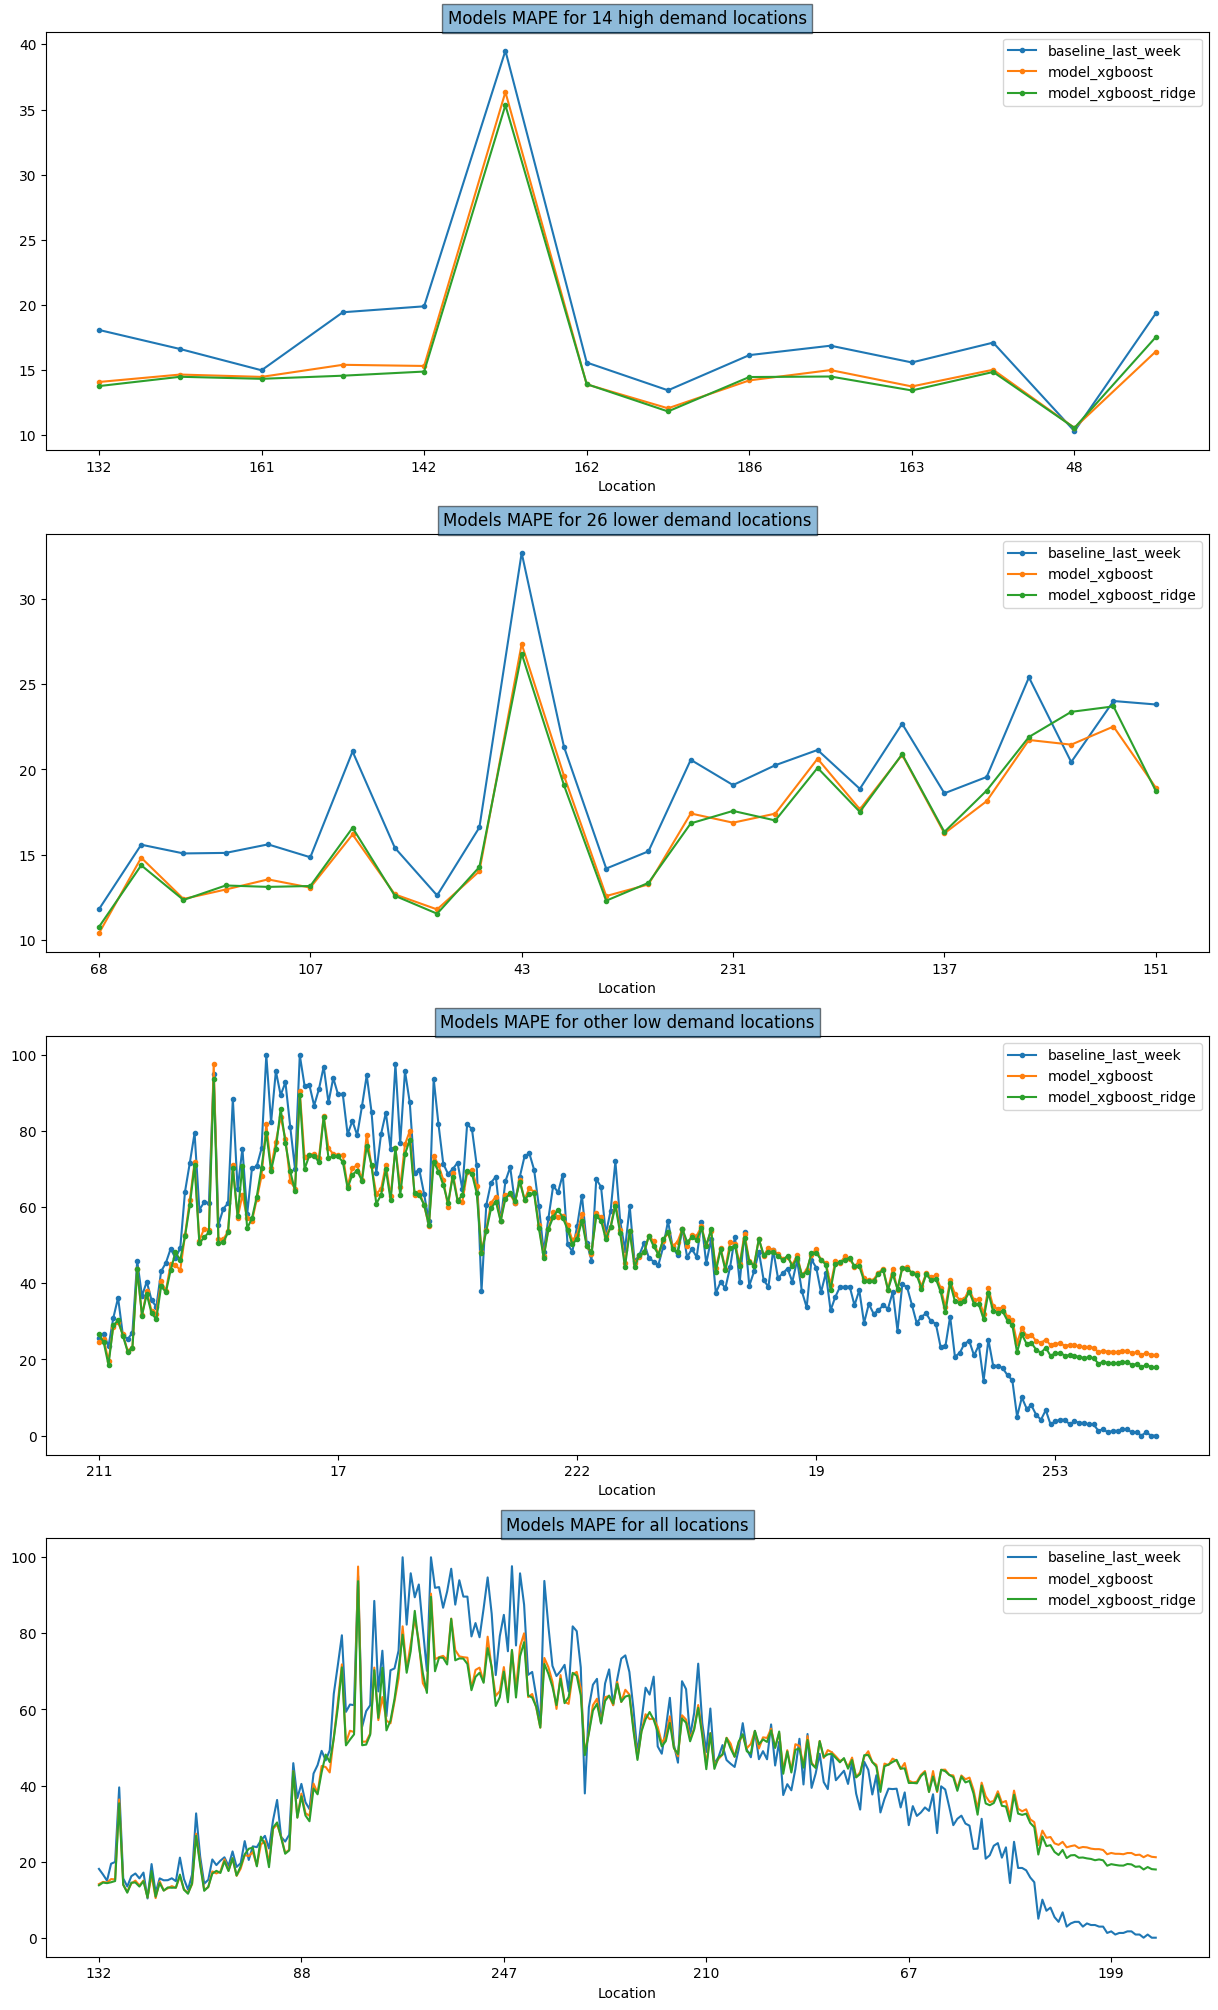

In [33]:
plot_mape(predictions_mean_error_dict, 'Location')

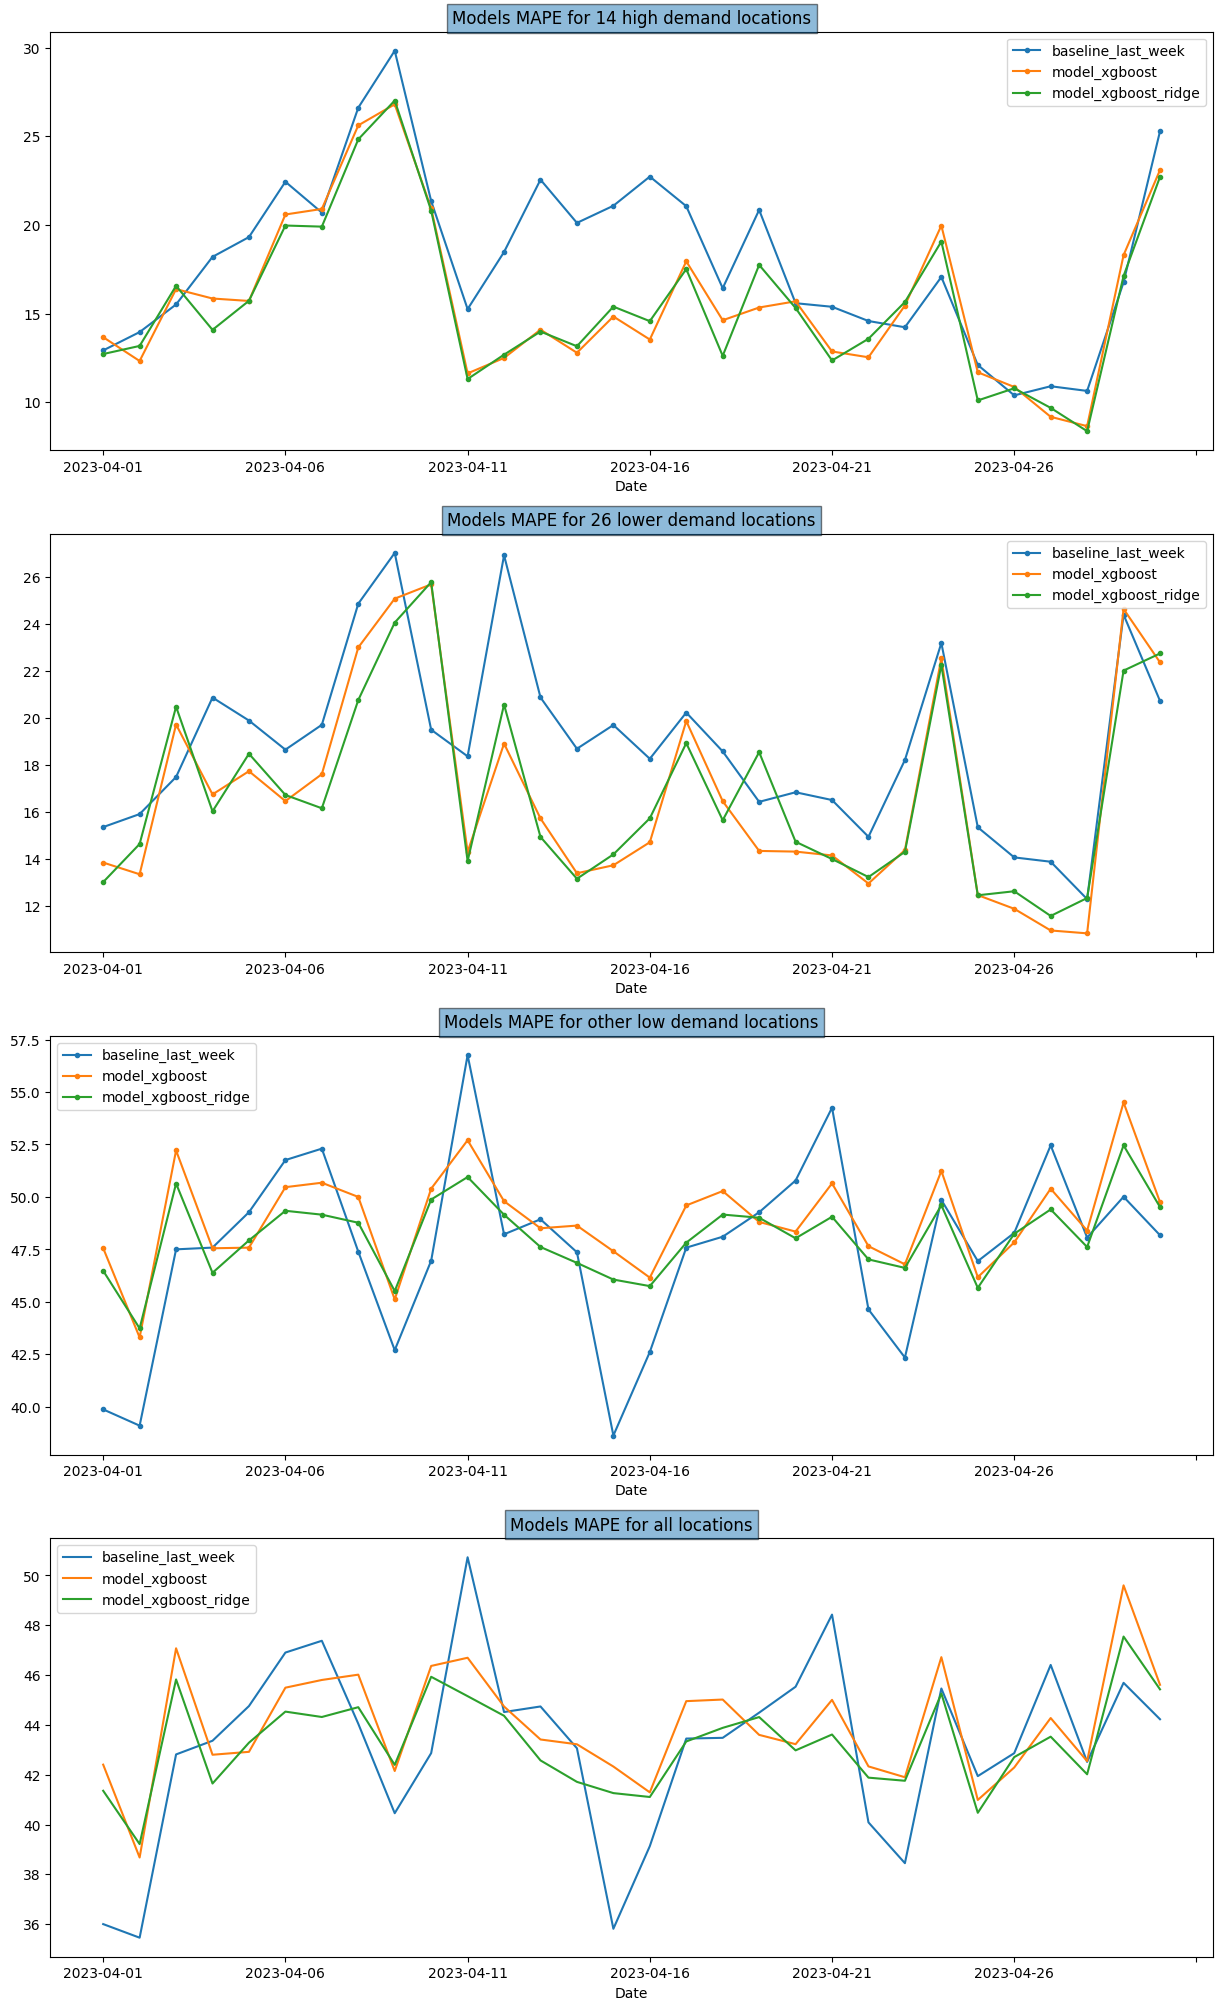

In [34]:
plot_mape(predictions_mean_error_dict, 'Date')

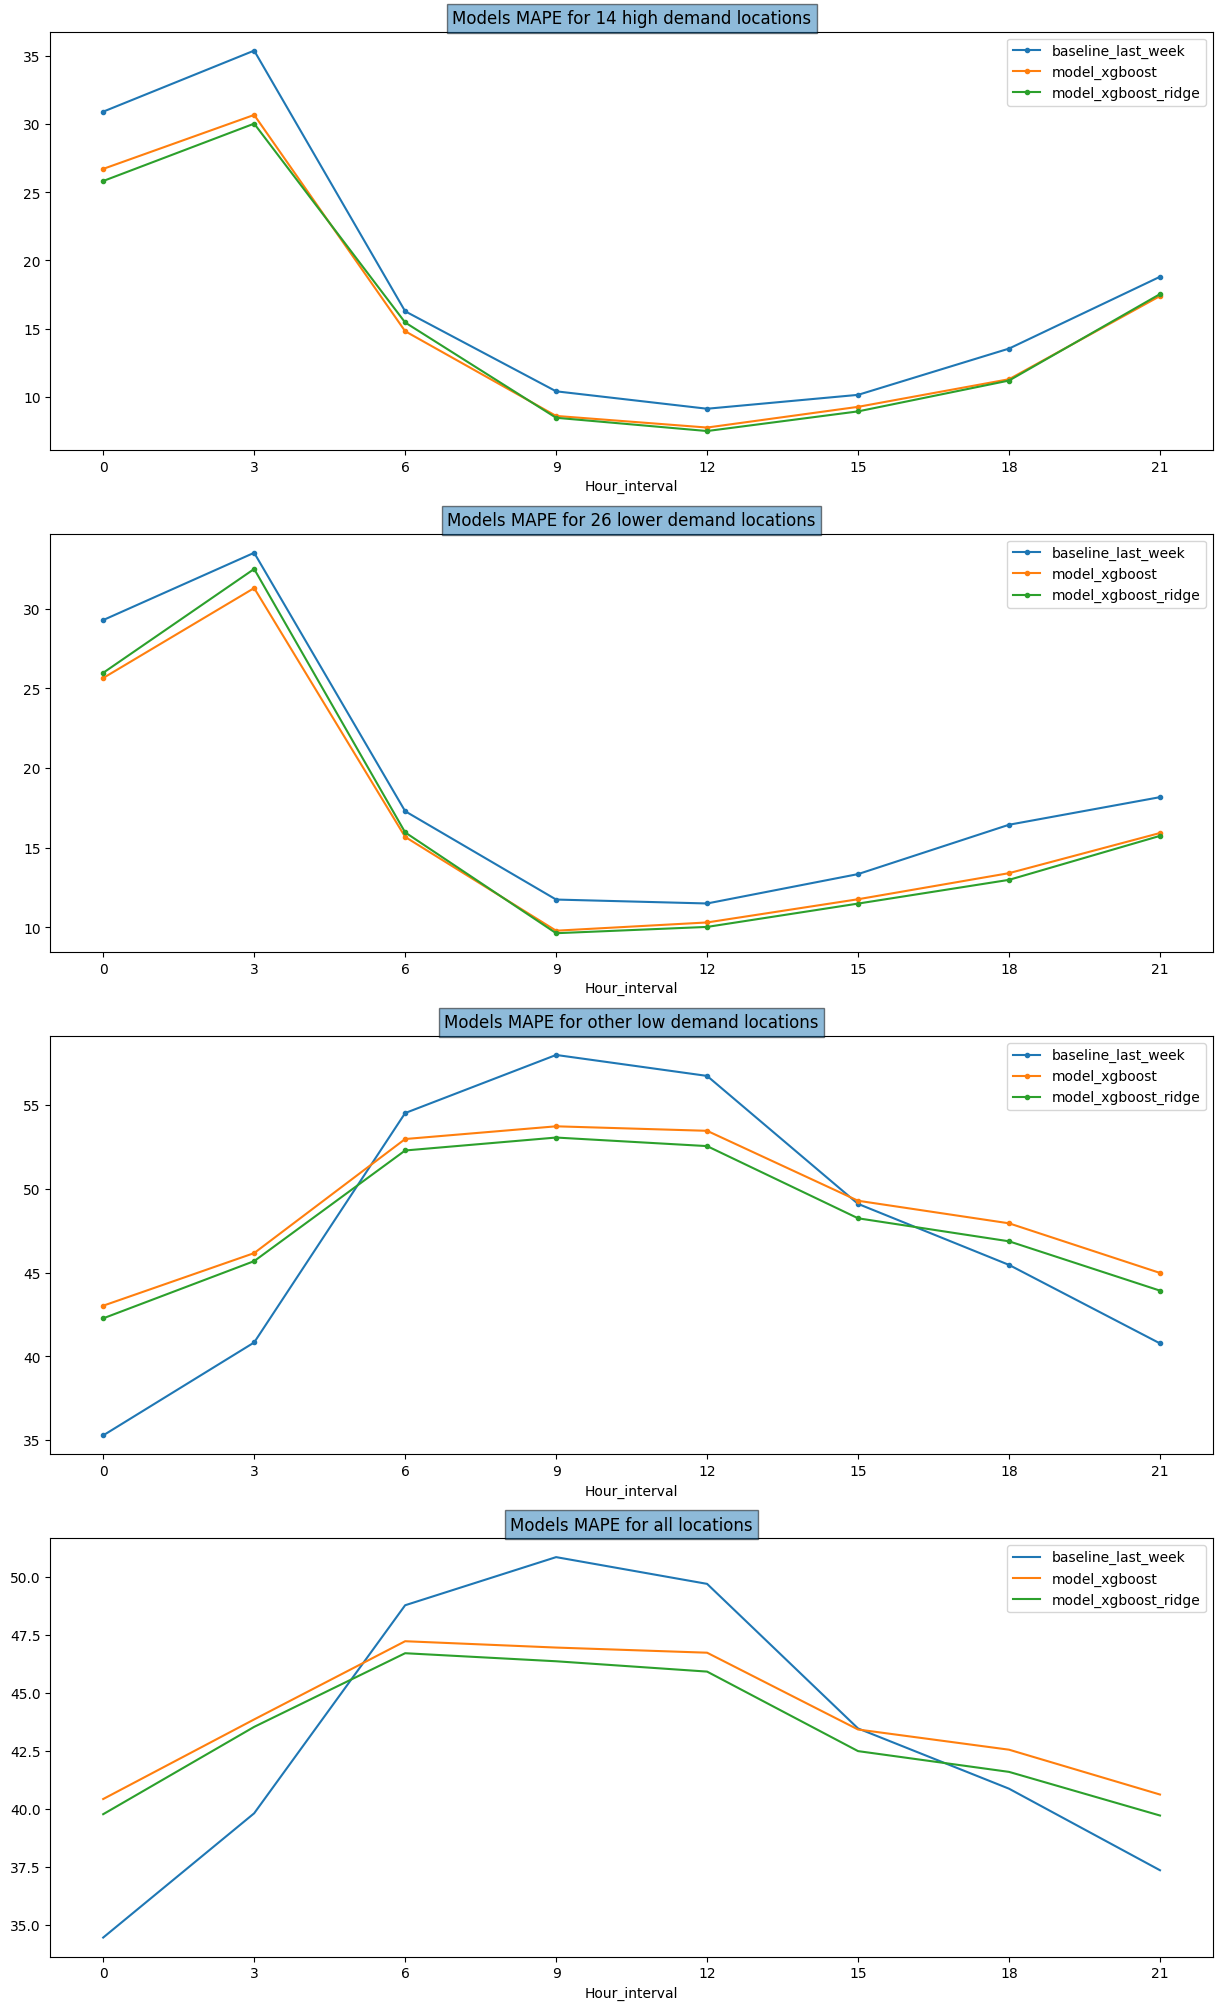

In [35]:
plot_mape(predictions_mean_error_dict, 'Hour_interval')

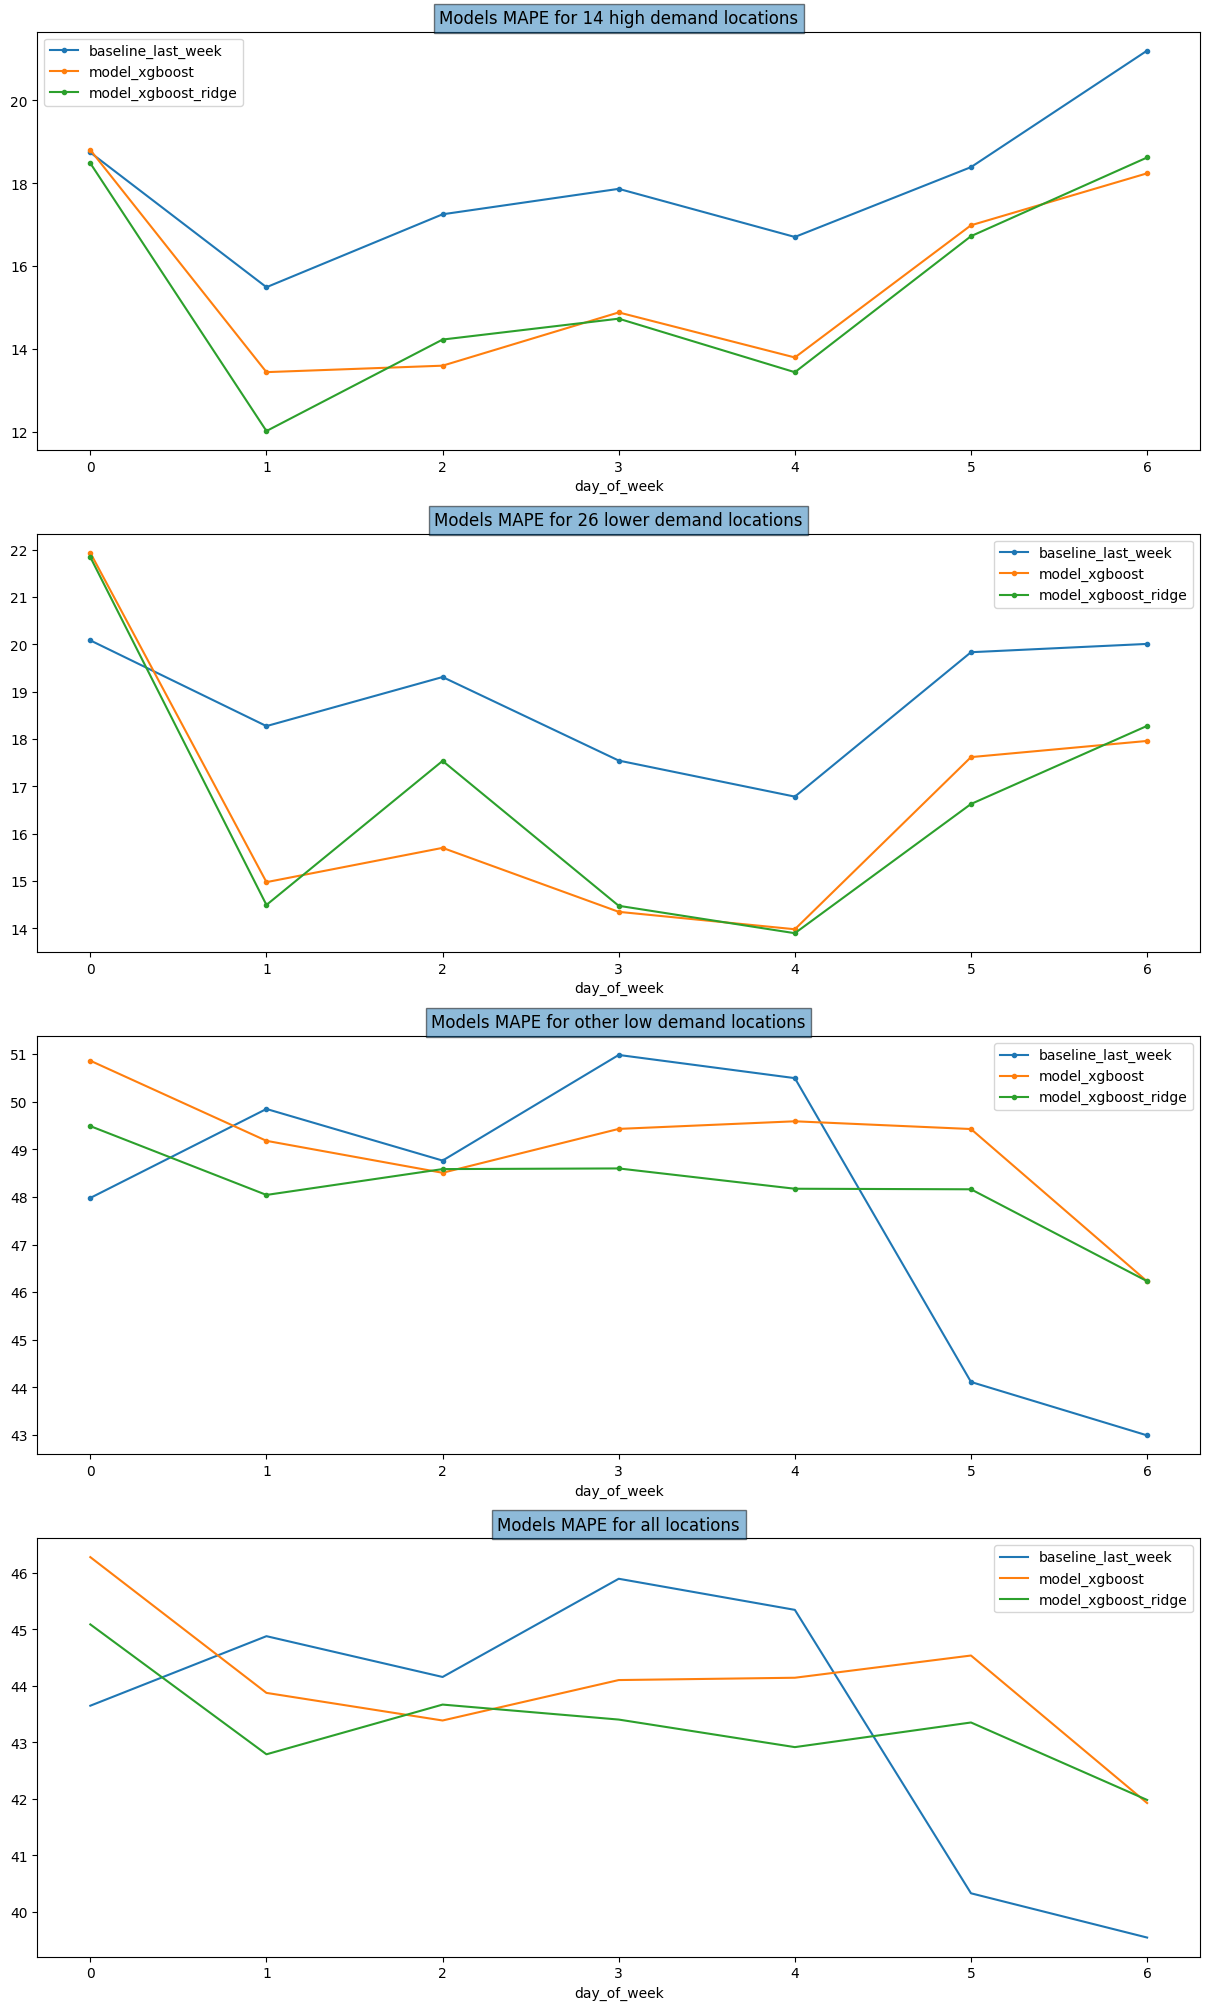

In [36]:
plot_mape(predictions_mean_error_dict, 'day_of_week')

### Plot MAE

In [37]:
def plot_mae(predictions_mean_dict, per):
    
    fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(15,25))
    
    for model,mean_df in predictions_mean_dict.items():
        high_demand_df = mean_df[per]['high_demand_loc']
        mid_demand_df = mean_df[per]['mid_demand_loc']
        low_demand_df = mean_df[per]['low_demand_loc']
        all_df = mean_df[per]['all_loc']
        
        if ((low_demand_df is not None) and 
            (mid_demand_df is not None)and 
            (high_demand_df is not None)and 
            (all_df is not None)):

            high_demand_df[per] = high_demand_df[per].astype(str)
            mid_demand_df[per] = mid_demand_df[per].astype(str)
            low_demand_df[per] = low_demand_df[per].astype(str)
            all_df[per] = all_df[per].astype(str)

            high_demand_df.plot(x=per,y='mae',kind='line',marker='.',ax = axes[0], label=model)            
            mid_demand_df.plot(x=per,y='mae',kind='line',marker='.',ax = axes[1],label=model)
            low_demand_df.plot(x=per,y='mae',kind='line',marker='.',ax = axes[2],label=model)
            all_df.plot(x=per,y='mae',kind='line',ax = axes[3],label=model)

    axes[0].set_title('Models MAE for '+str(HIGH_DEMAND_NUMS)+' high demand locations', bbox=dict( alpha=0.5)) 
    axes[1].set_title('Models MAE for '+str(MID_DEMAND_NUMS)+' lower demand locations', bbox=dict( alpha=0.5)) 
    axes[2].set_title('Models MAE for other low demand locations', bbox=dict( alpha=0.5)) 
    axes[-1].set_title('Models MAE for all locations', bbox=dict(alpha=0.5))

    # plot_name = SAVE_PLOT_PATH + 'ME_plot per '+per+'.svg'
    # plt.savefig(plot_name, format='svg', dpi=1200)  


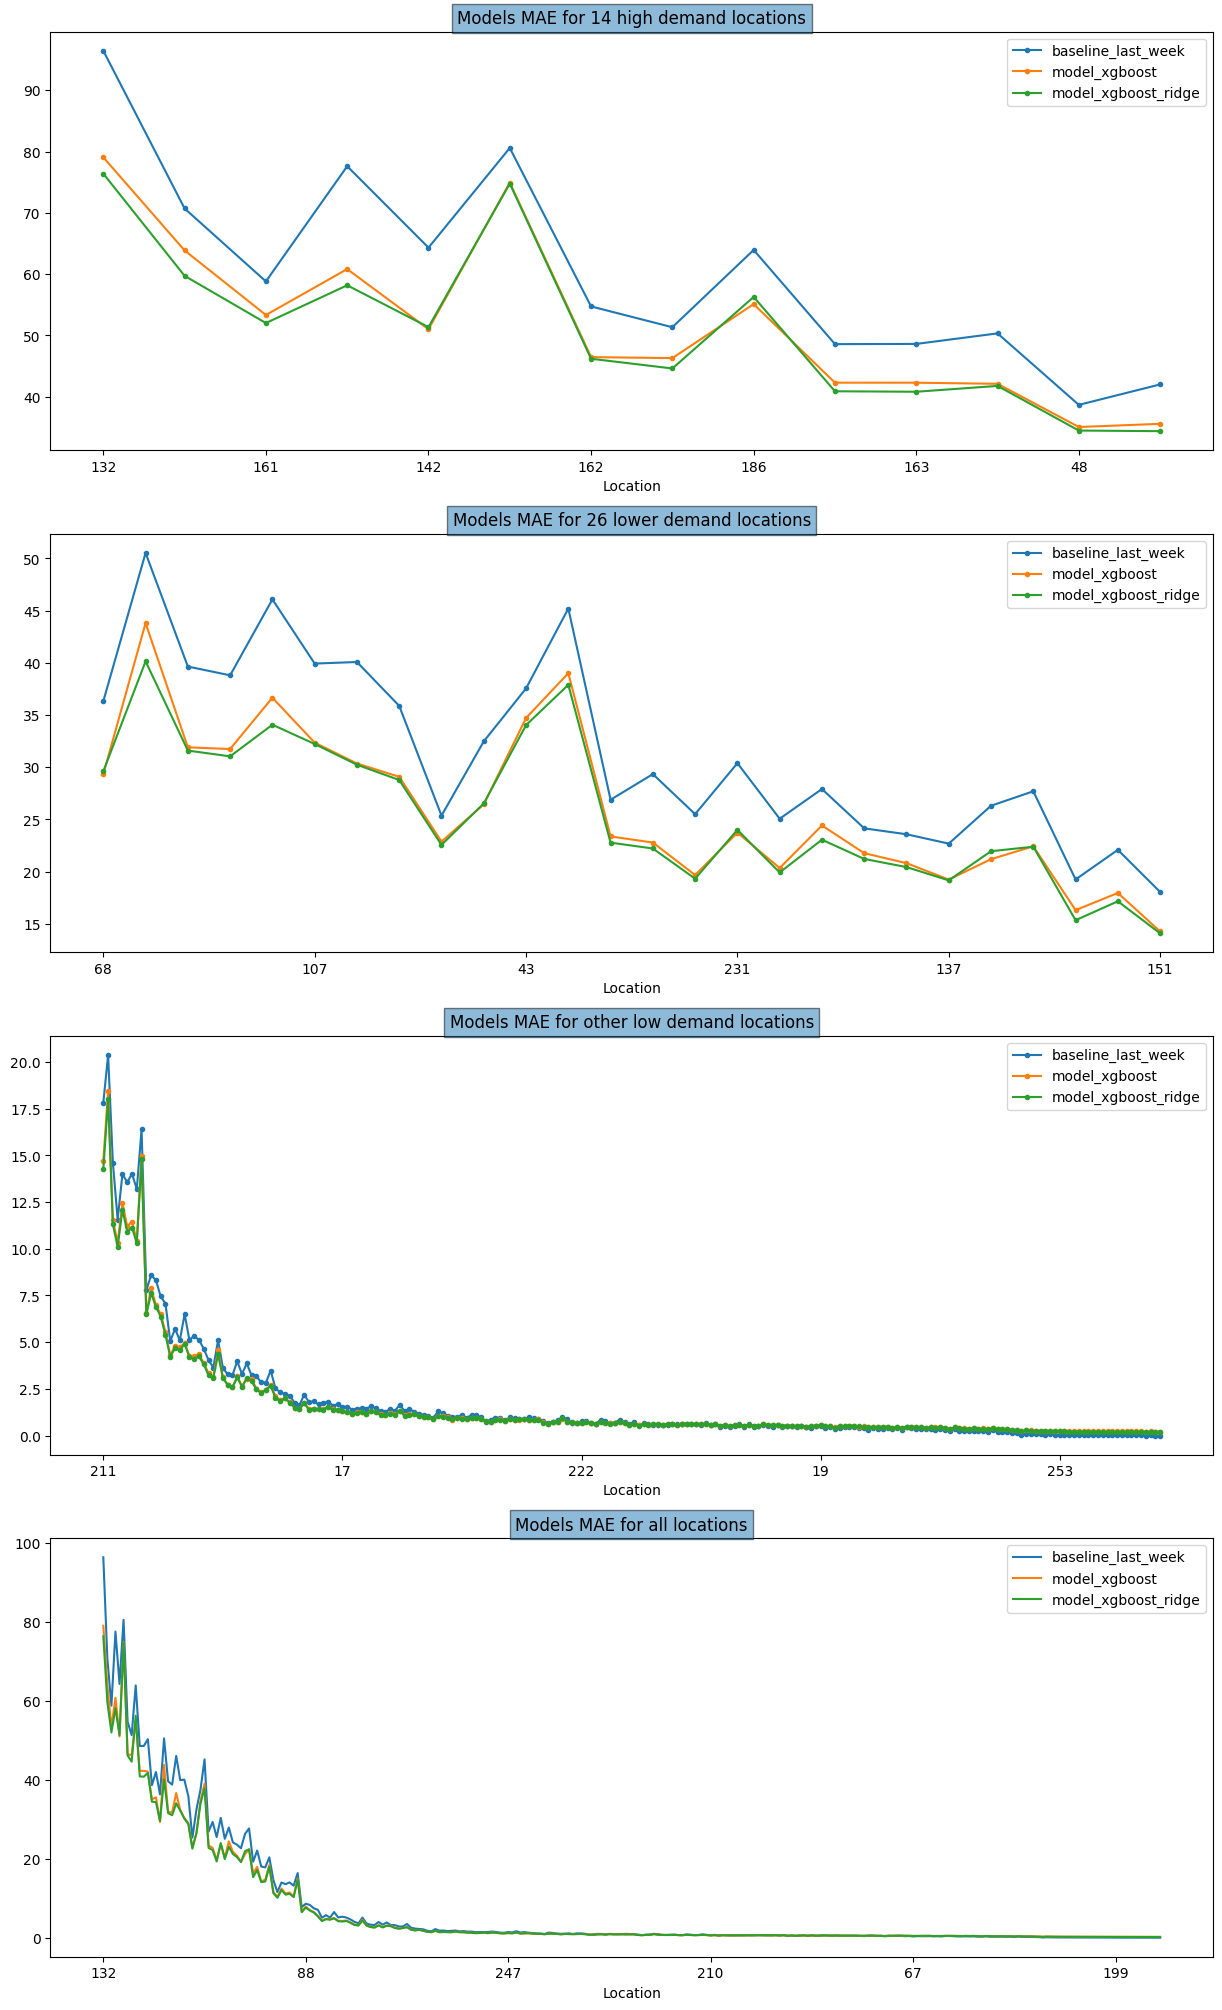

In [38]:
plot_mae(predictions_mean_error_dict, 'Location')

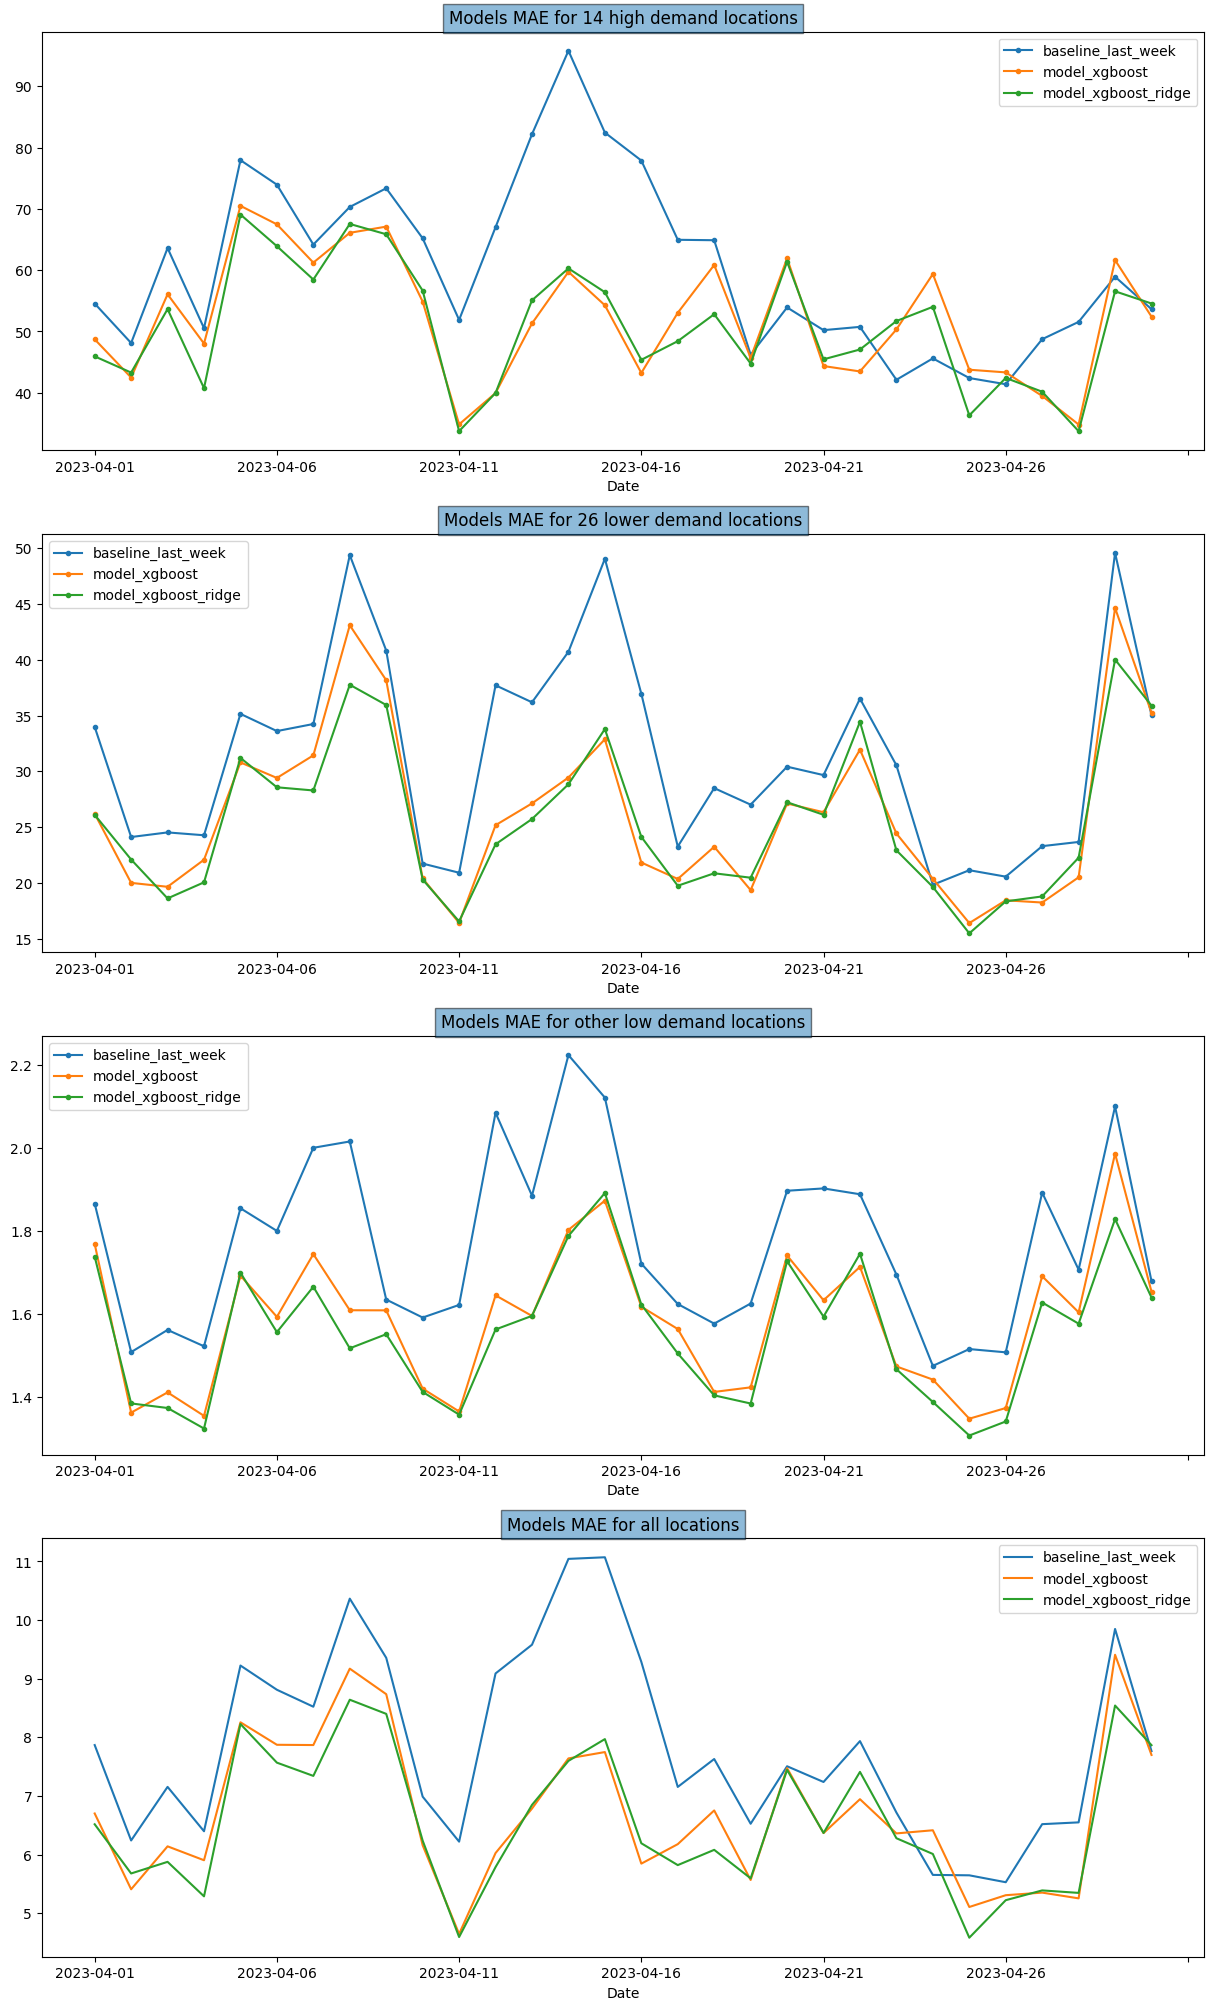

In [39]:
plot_mae(predictions_mean_error_dict, 'Date')

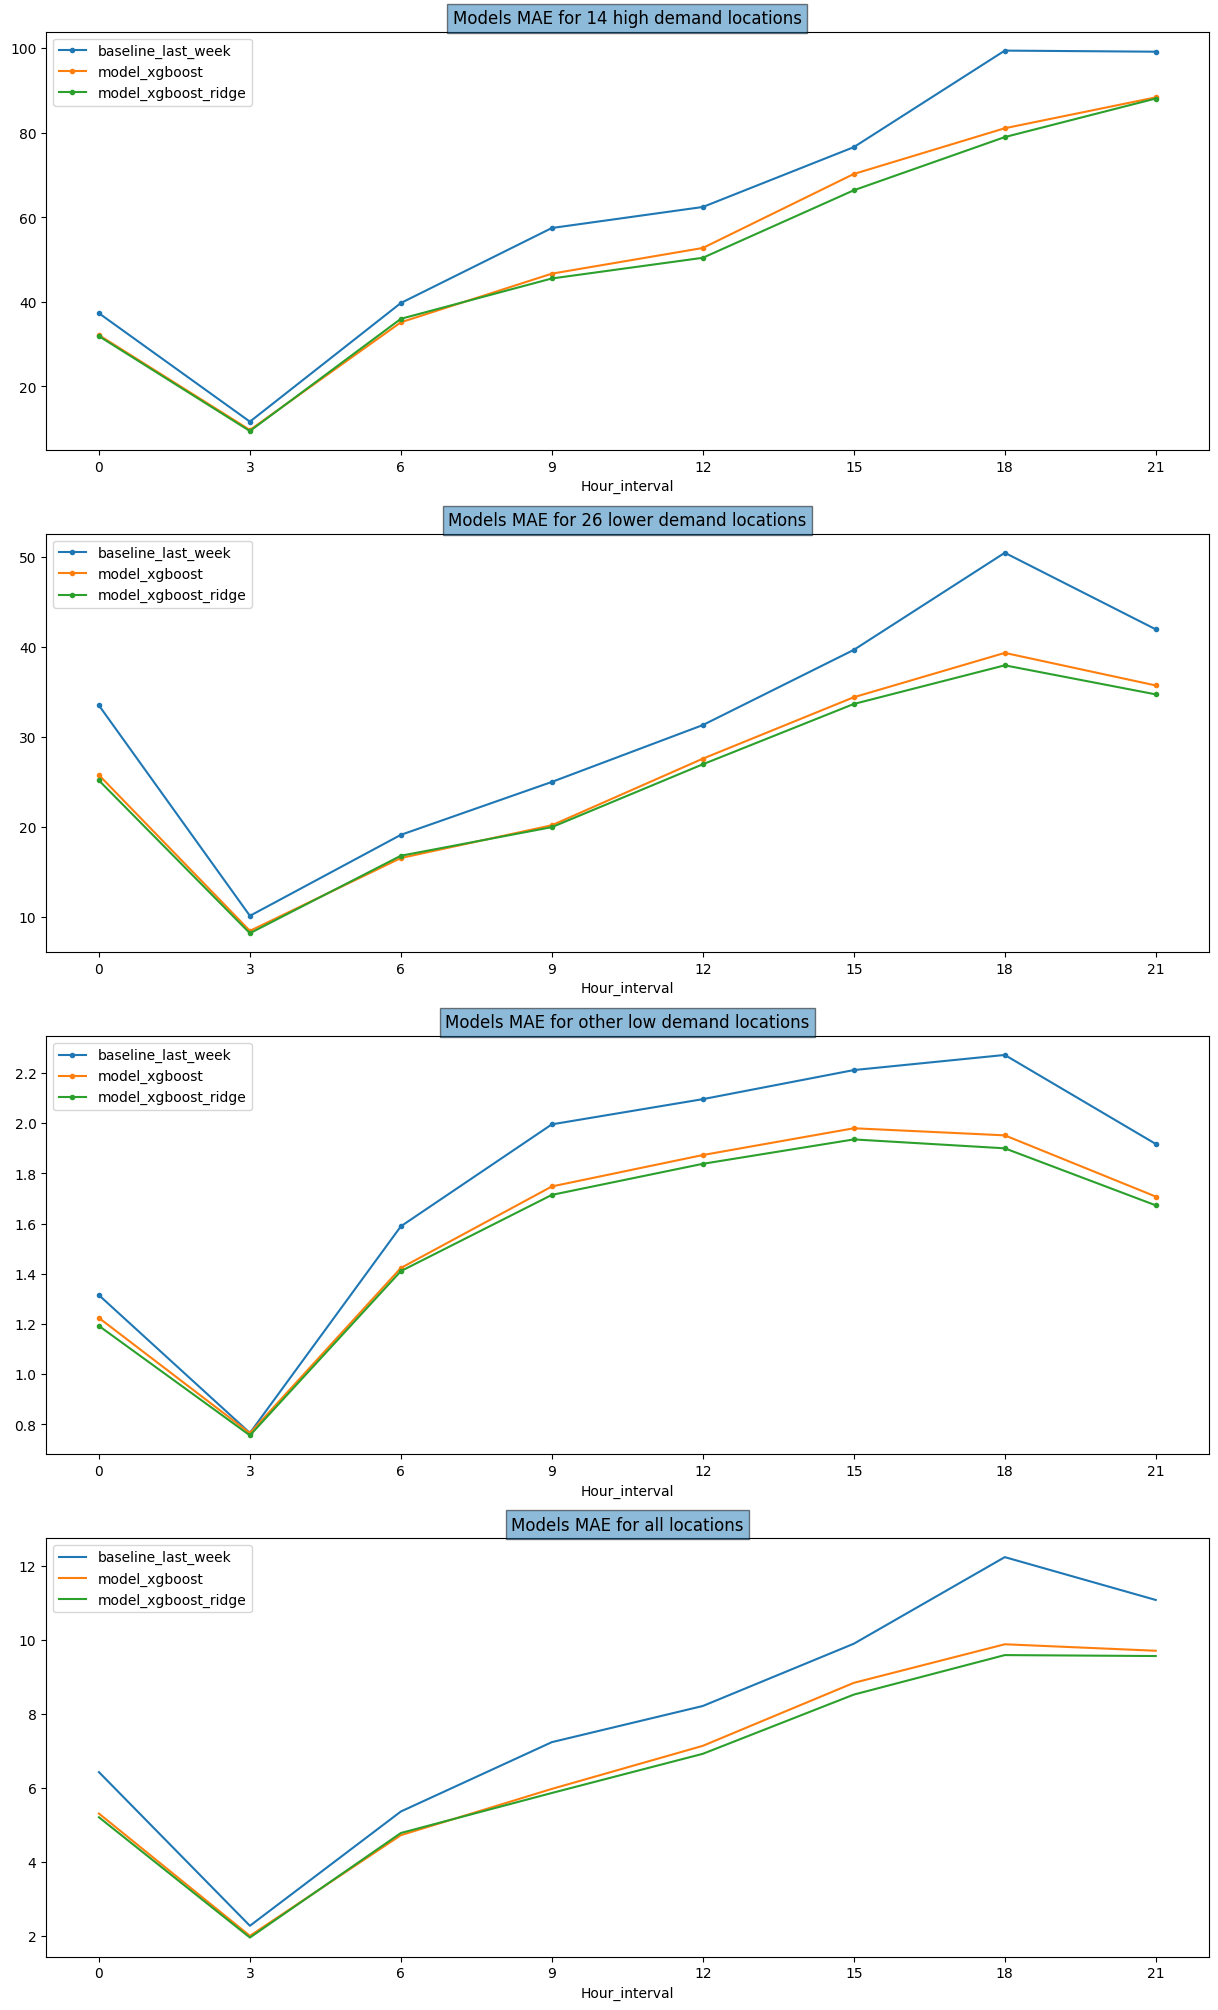

In [40]:
plot_mae(predictions_mean_error_dict, 'Hour_interval')

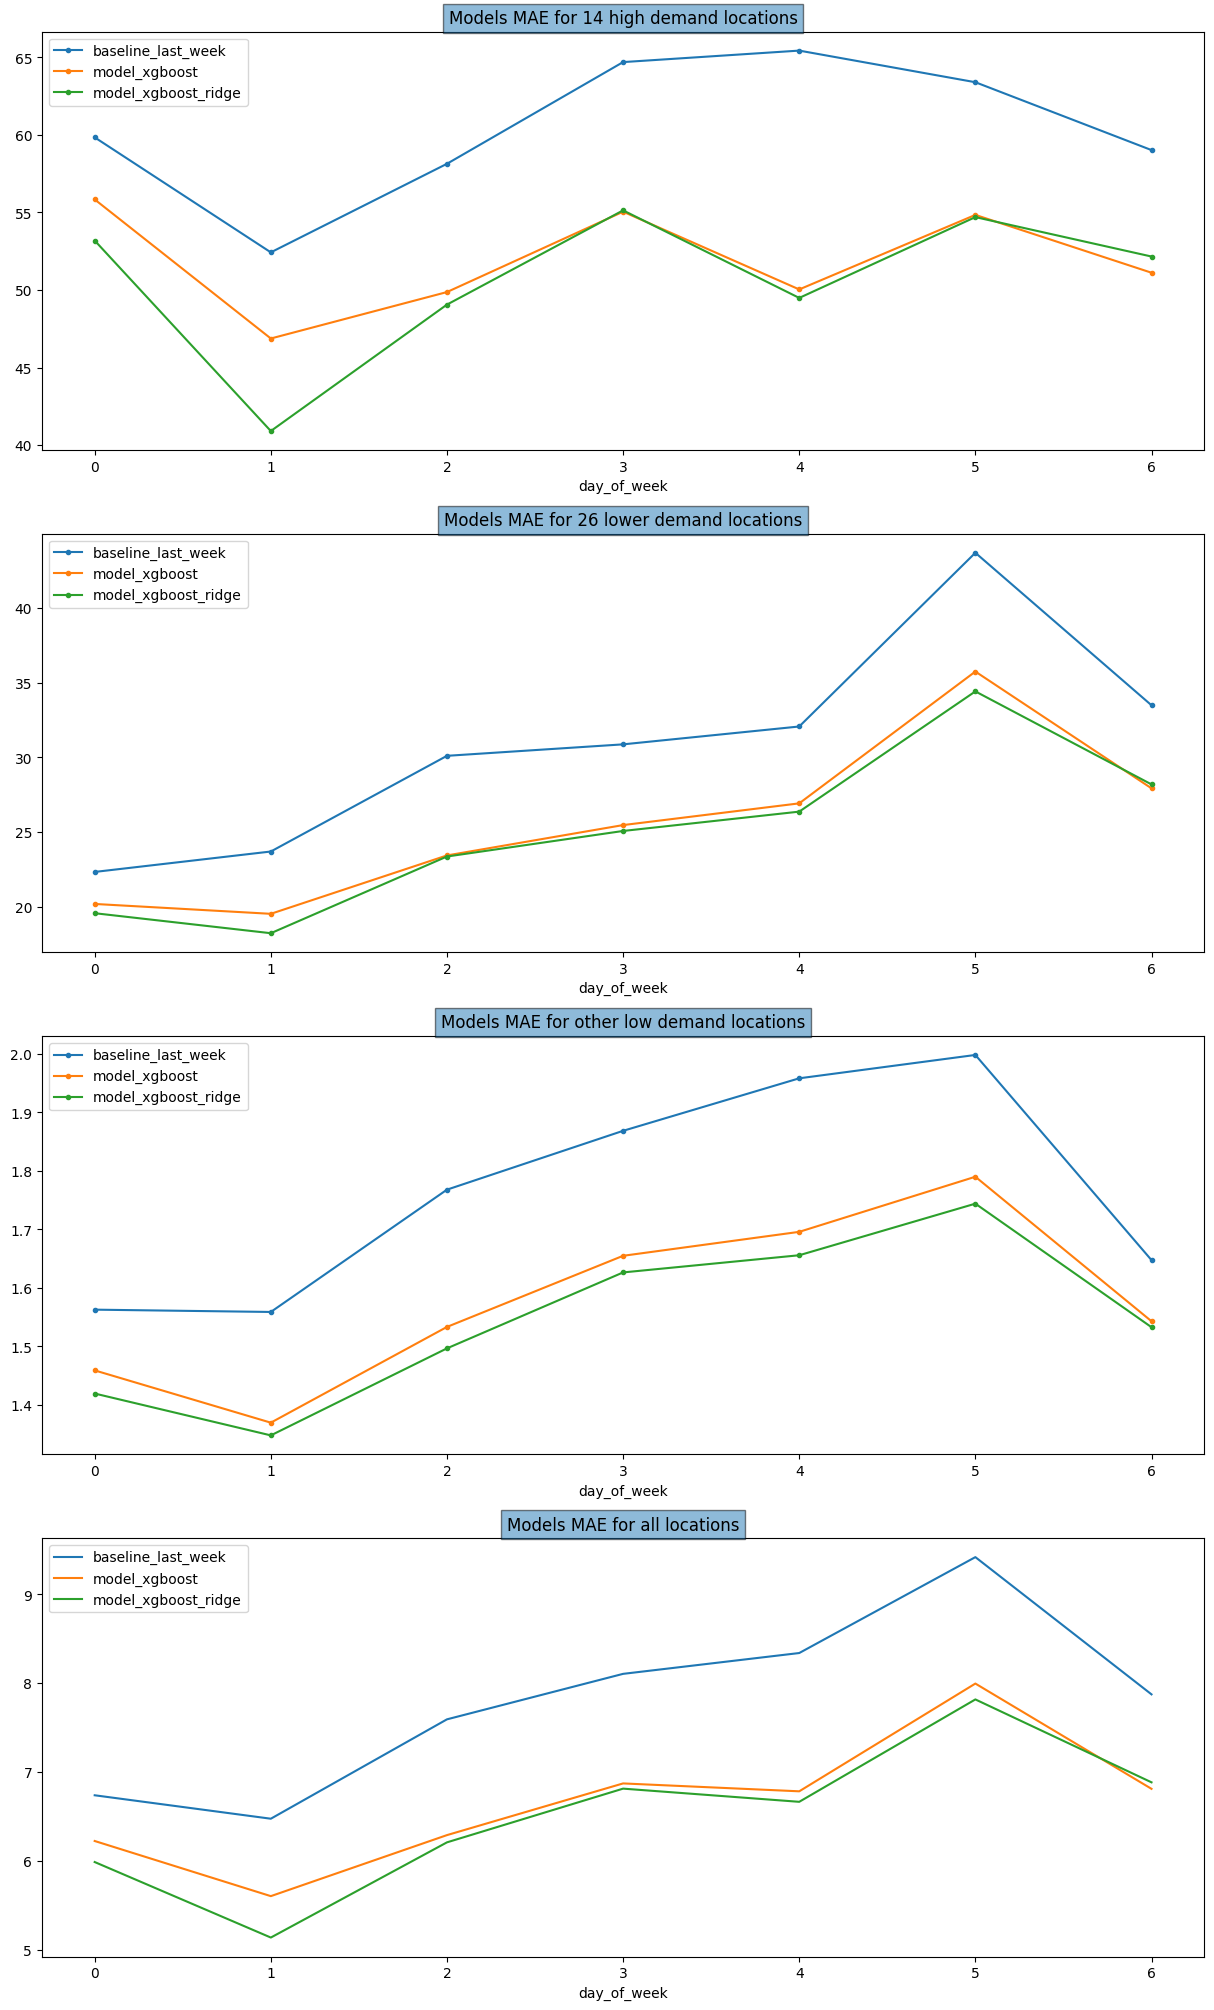

In [41]:
plot_mae(predictions_mean_error_dict, 'day_of_week')

### plot RMSE

In [42]:
def plot_rmse(predictions_mean_dict, per):
    
    fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(15,25))
    
    for model,mean_df in predictions_mean_dict.items():
        high_demand_df = mean_df[per]['high_demand_loc']
        mid_demand_df = mean_df[per]['mid_demand_loc']
        low_demand_df = mean_df[per]['low_demand_loc']
        all_df = mean_df[per]['all_loc']
        if ((low_demand_df is not None) and 
            (mid_demand_df is not None)and 
            (high_demand_df is not None)and 
            (all_df is not None)):
            
            high_demand_df[per] = high_demand_df[per].astype(str)
            mid_demand_df[per] = mid_demand_df[per].astype(str)
            low_demand_df[per] = low_demand_df[per].astype(str)
            all_df[per] = all_df[per].astype(str)

            high_demand_df['rmse'] = np.sqrt(high_demand_df['mse'])
            mid_demand_df['rmse'] = np.sqrt(mid_demand_df['mse'])
            low_demand_df['rmse'] = np.sqrt(low_demand_df['mse'])
            all_df['rmse'] = np.sqrt(all_df['mse'])

            high_demand_df.plot(x=per,y='rmse',kind='line',marker='.',ax = axes[0], label=model)            
            mid_demand_df.plot(x=per,y='rmse',kind='line',marker='.',ax = axes[1],label=model)
            low_demand_df.plot(x=per,y='rmse',kind='line',marker='.',ax = axes[2],label=model)
            all_df.plot(x=per,y='rmse',kind='line',ax = axes[3],label=model)

    axes[0].set_title('Models RMSE for '+str(HIGH_DEMAND_NUMS)+' high demand locations', bbox=dict( alpha=0.5)) 
    axes[1].set_title('Models RMSE for '+str(MID_DEMAND_NUMS)+' lower demand locations', bbox=dict( alpha=0.5)) 
    axes[2].set_title('Models RMSE for other low demand locations', bbox=dict( alpha=0.5)) 
    axes[-1].set_title('Models RMSE for all locations', bbox=dict(alpha=0.5))

    # plot_name = SAVE_PLOT_PATH + 'ME_plot per '+per+'.svg'
    # plt.savefig(plot_name, format='svg', dpi=1200)  


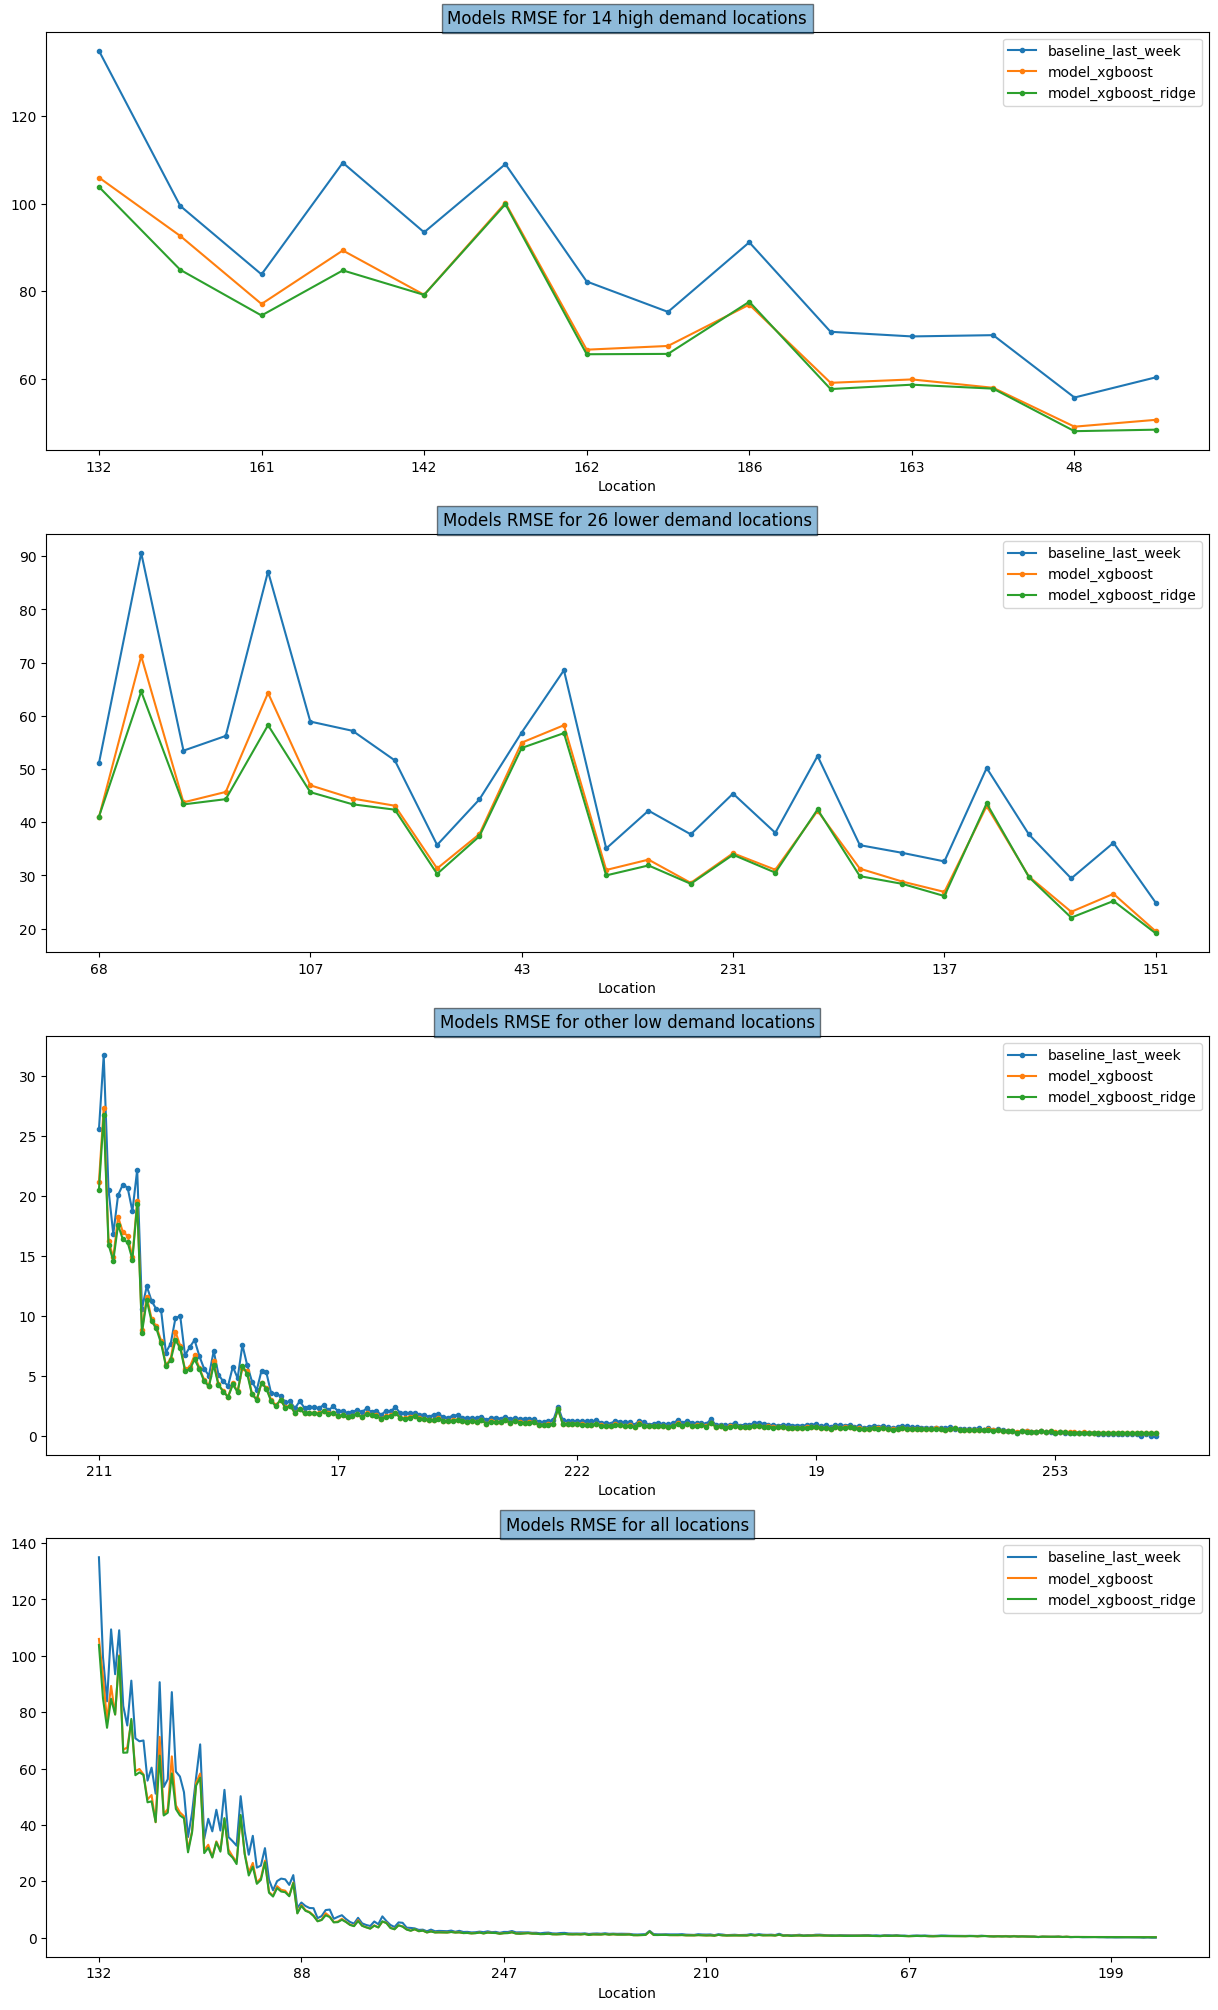

In [43]:
plot_rmse(predictions_mean_error_dict, 'Location')

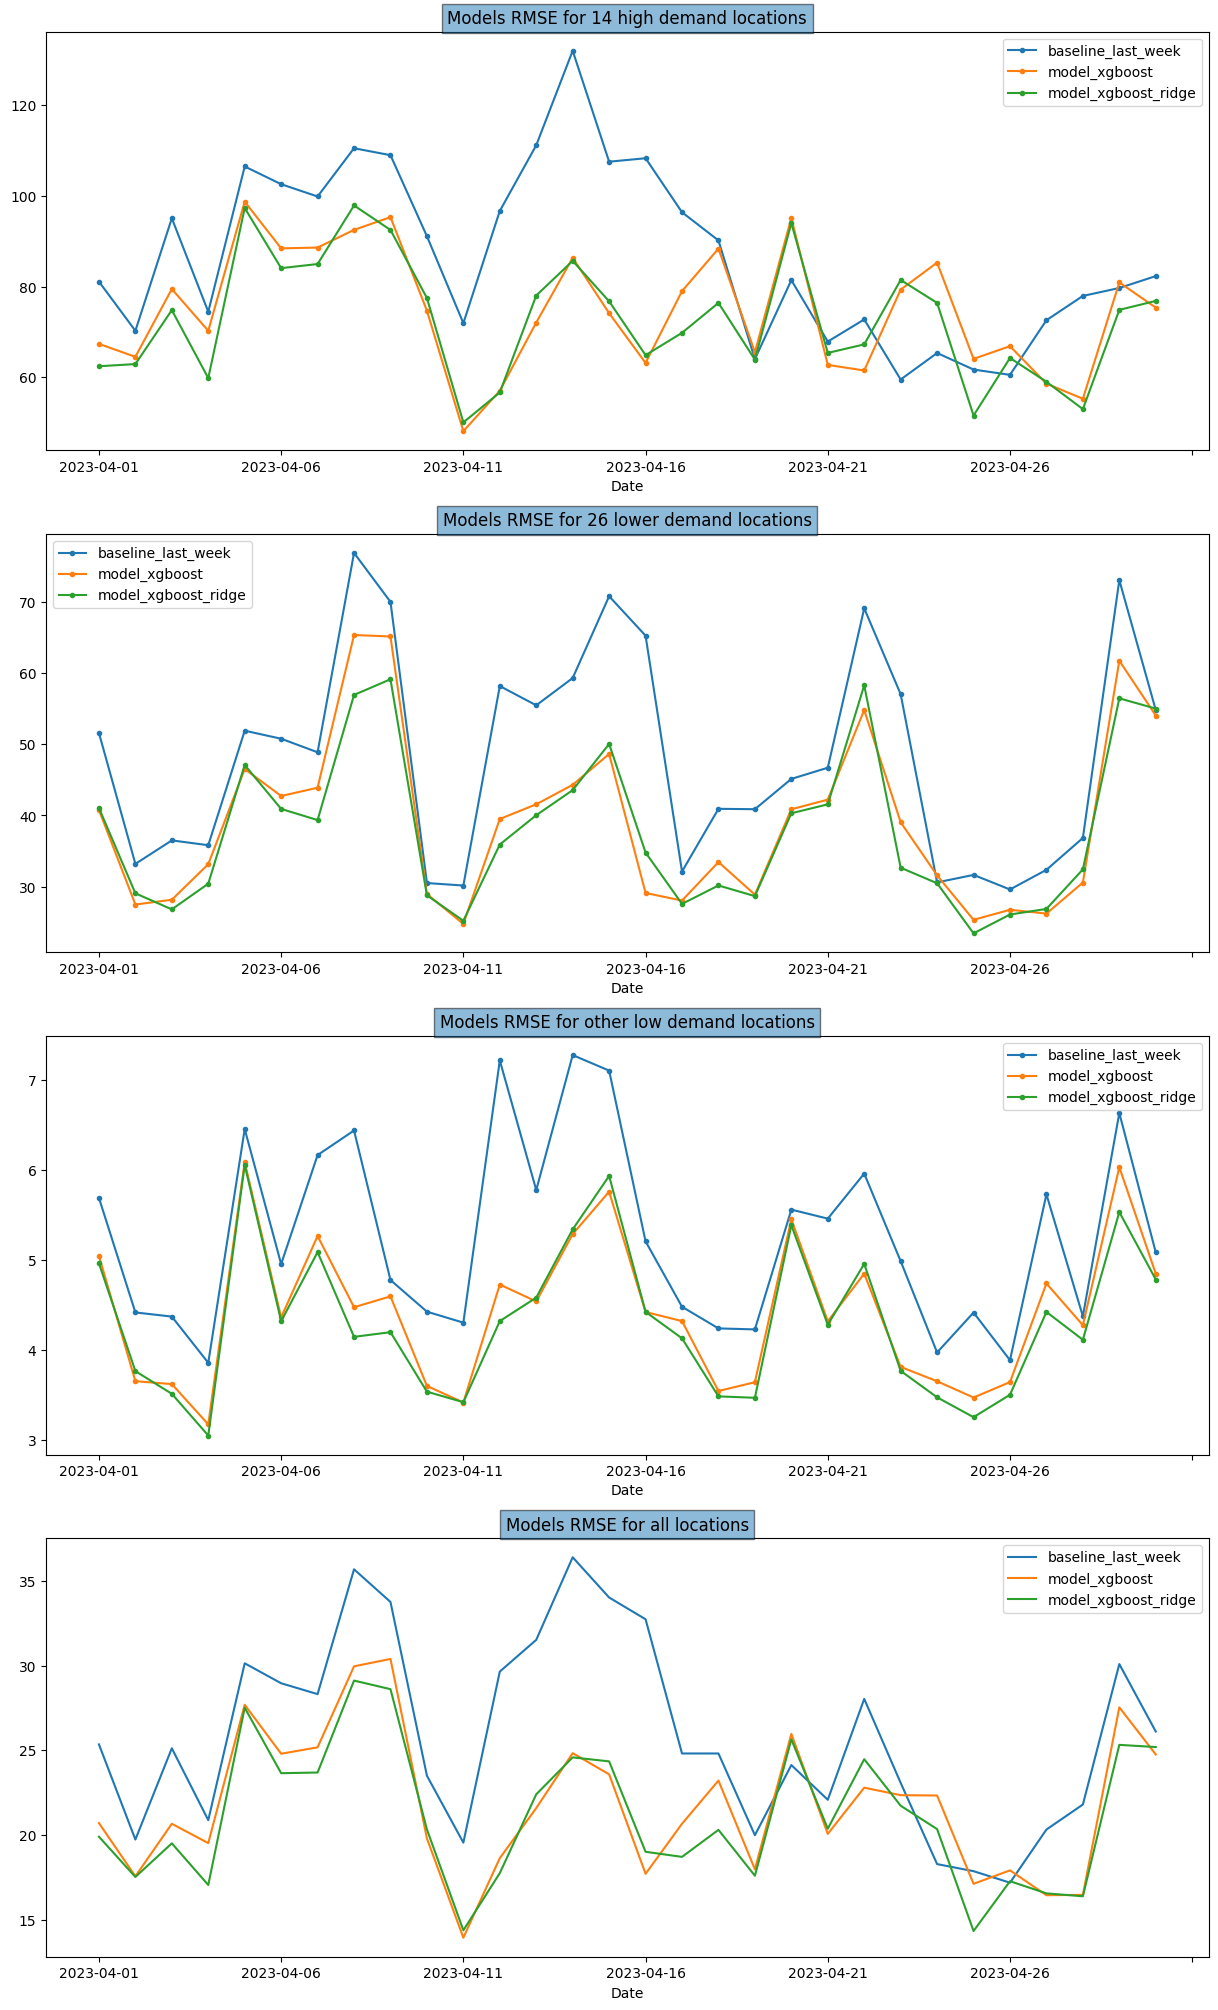

In [44]:
plot_rmse(predictions_mean_error_dict, 'Date')

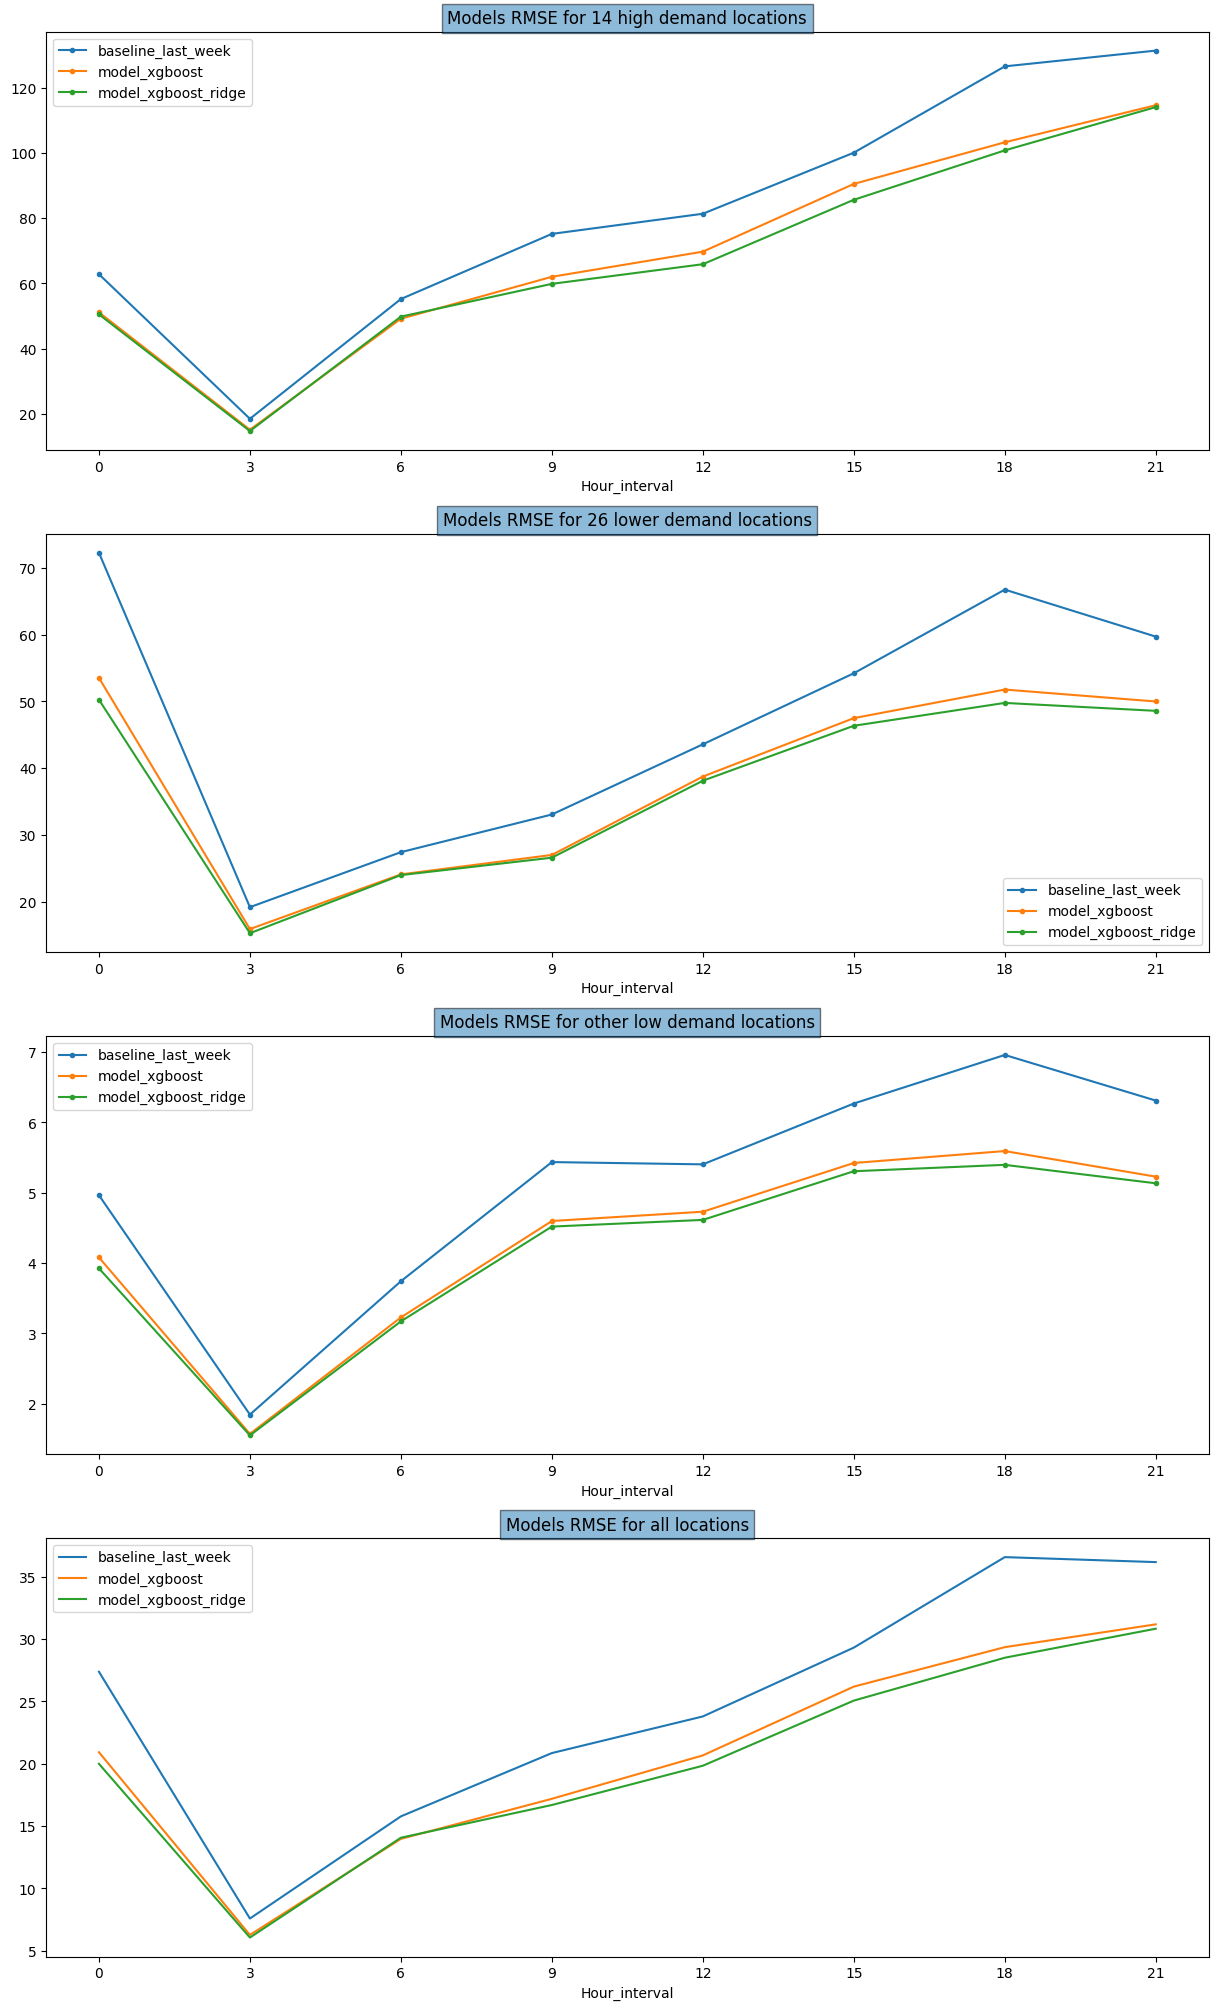

In [45]:
plot_rmse(predictions_mean_error_dict, 'Hour_interval')

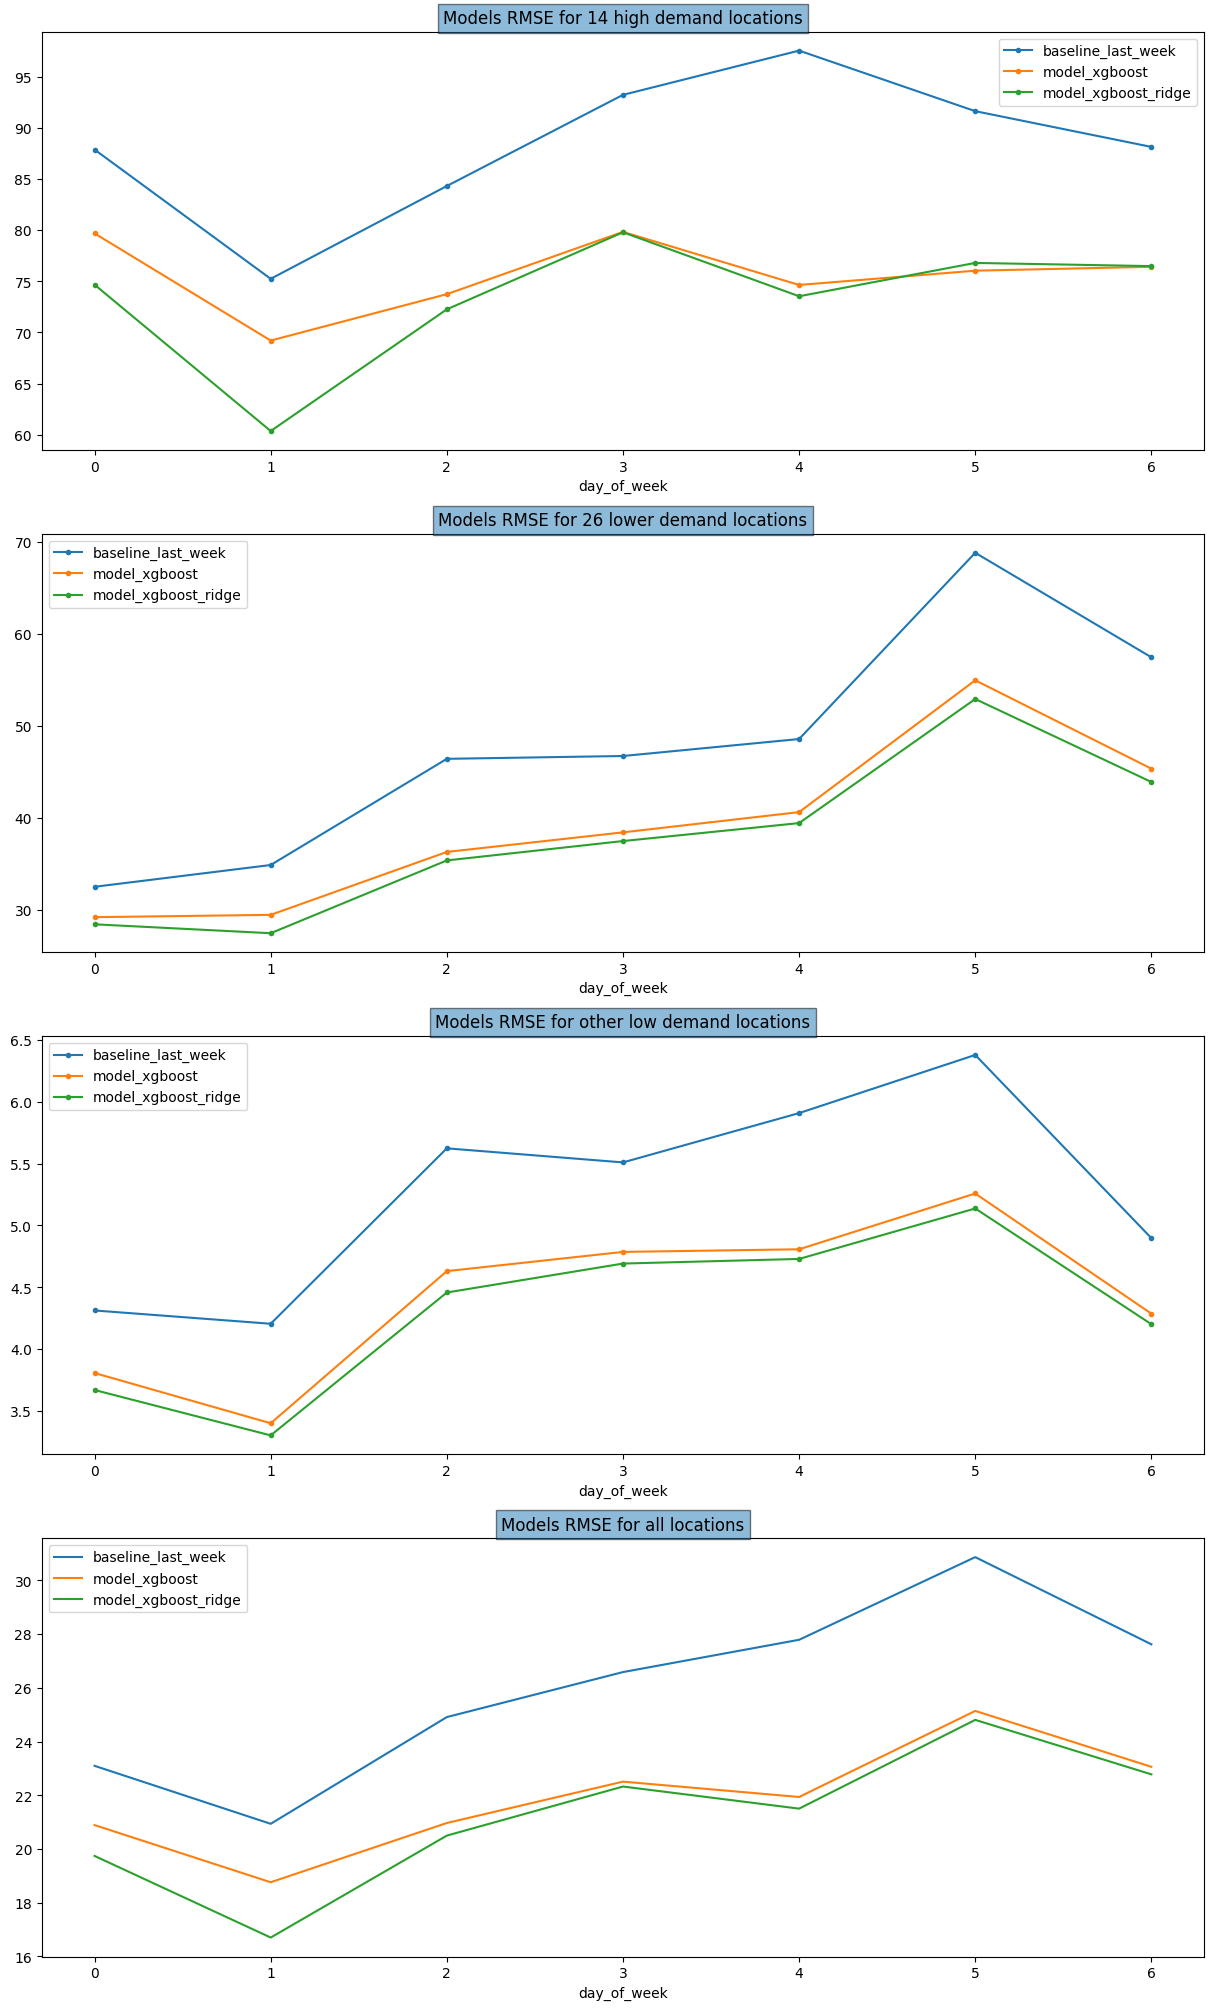

In [46]:
plot_rmse(predictions_mean_error_dict, 'day_of_week')

# Table of Results

In [47]:
def create_table_errors(predictions_dict, report_dict):
    for model, error_df in predictions_dict.items():
        if error_df is not None:
            report_dict['all_locations']['MAE'][model] = error_df['error'].mean()            
            report_dict['all_locations']['RMSE'][model] = np.sqrt(error_df['squared_error'].mean())
            report_dict['all_locations']['MAPE'][model] = error_df['percentage_error'].mean()

            error_high_demand_df = error_df.loc[error_df['Location'].isin(sorted_locations_dict[model][:HIGH_DEMAND_NUMS]['Location'])]
            error_mid_demand_df = error_df.loc[error_df['Location'].isin(sorted_locations_dict[model][HIGH_DEMAND_NUMS:HIGH_DEMAND_NUMS+MID_DEMAND_NUMS]['Location'])]
            error_low_demand_df = error_df.loc[error_df['Location'].isin(sorted_locations_dict[model][HIGH_DEMAND_NUMS+MID_DEMAND_NUMS:]['Location'])]

            report_dict['high_demand_locations']['MAE'][model] = error_high_demand_df['error'].mean()            
            report_dict['high_demand_locations']['RMSE'][model] = np.sqrt(error_high_demand_df['squared_error'].mean())
            report_dict['high_demand_locations']['MAPE'][model] = error_high_demand_df['percentage_error'].mean()
            
            report_dict['mid_demand_locations']['MAE'][model] = error_mid_demand_df['error'].mean()            
            report_dict['mid_demand_locations']['RMSE'][model] = np.sqrt(error_mid_demand_df['squared_error'].mean())
            report_dict['mid_demand_locations']['MAPE'][model] = error_mid_demand_df['percentage_error'].mean()
            
            report_dict['low_demand_locations']['MAE'][model] = error_low_demand_df['error'].mean()            
            report_dict['low_demand_locations']['RMSE'][model] = np.sqrt(error_low_demand_df['squared_error'].mean())
            report_dict['low_demand_locations']['MAPE'][model] = error_low_demand_df['percentage_error'].mean()
    return report_dict

In [48]:
report_dict = create_table_errors(predictions_dict, report_dict)
report_df = pd.DataFrame.from_dict({(i,j): report_dict[i][j] 
                            for i in report_dict.keys() 
                            for j in report_dict[i].keys()},
                            orient='index')

report_df.index = pd.MultiIndex.from_tuples(report_df.index)
report_df = report_df.T

In [49]:
df = pd.DataFrame(report_df,
                  index=pd.Index(report_df.index),
                  columns=pd.MultiIndex.from_product([['high_demand_locations', 'mid_demand_locations', 'low_demand_locations', 'all_locations'],
                                                      ['MAPE','MAE','RMSE']], names=['location category:', 'Error Metrics:']))


In [50]:
df

location category:  high_demand_locations                        \
Error Metrics:                       MAPE        MAE       RMSE   
baseline_last_week              18.072123  60.475298   88.62356   
model_regression                     None       None       None   
model_xgboost                    15.80812  52.013772  75.757688   
model_xgboost_ridge             15.612439  50.845368  73.842735   

location category:  mid_demand_locations                        \
Error Metrics:                      MAPE        MAE       RMSE   
baseline_last_week             18.907984  31.414103  50.359923   
model_regression                    None       None       None   
model_xgboost                  16.723256  26.022582  40.861784   
model_xgboost_ridge            16.785526  25.452679  39.488654   

location category:  low_demand_locations                     all_locations  \
Error Metrics:                      MAPE       MAE      RMSE          MAPE   
baseline_last_week             47.592811  1.769895  5.342577     43.168784   
model_regression                    None      None      None          None   
model_xgboost                  48.951223  1.583834  4.487517     43.982023   
model_xgboost_ridge            48.116362  1.552267  4.376535     43.270345   

location category:                        
Error Metrics:            MAE       RMSE  
baseline_last_week   7.848616  26.373248  
model_regression         None       None  
model_xgboost        6.703783  22.123146  
model_xgboost_ridge  6.558046  21.502165

In [51]:
# df.style.format('{:.2f}')